<a href="https://colab.research.google.com/github/agustinivandinocco-python/pythonpracticateoria/blob/main/Colab/clase_05y06_2025_teoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formas de traer data a python

Hay muchas formas de obtener la materia prima de los datos para trabajar

  1. Leer un File en linea o local

      * 1.A- Leer un EXCEL asi como viene
      * 1.B- Leer un .csv o .txt y parsearlo
      * 1.C- Leer un ZIP (descomprimirlo ➜ parsear)
  
  2. Leer una tabla de datos en linea
  
  3. Usar un dataset
  
    * Estático de un paquete de python
  
    * De un repo específco de datos (Kaggle, HuggingFace, Github)

  5. Hacer webScraping

  6. Consumir un API

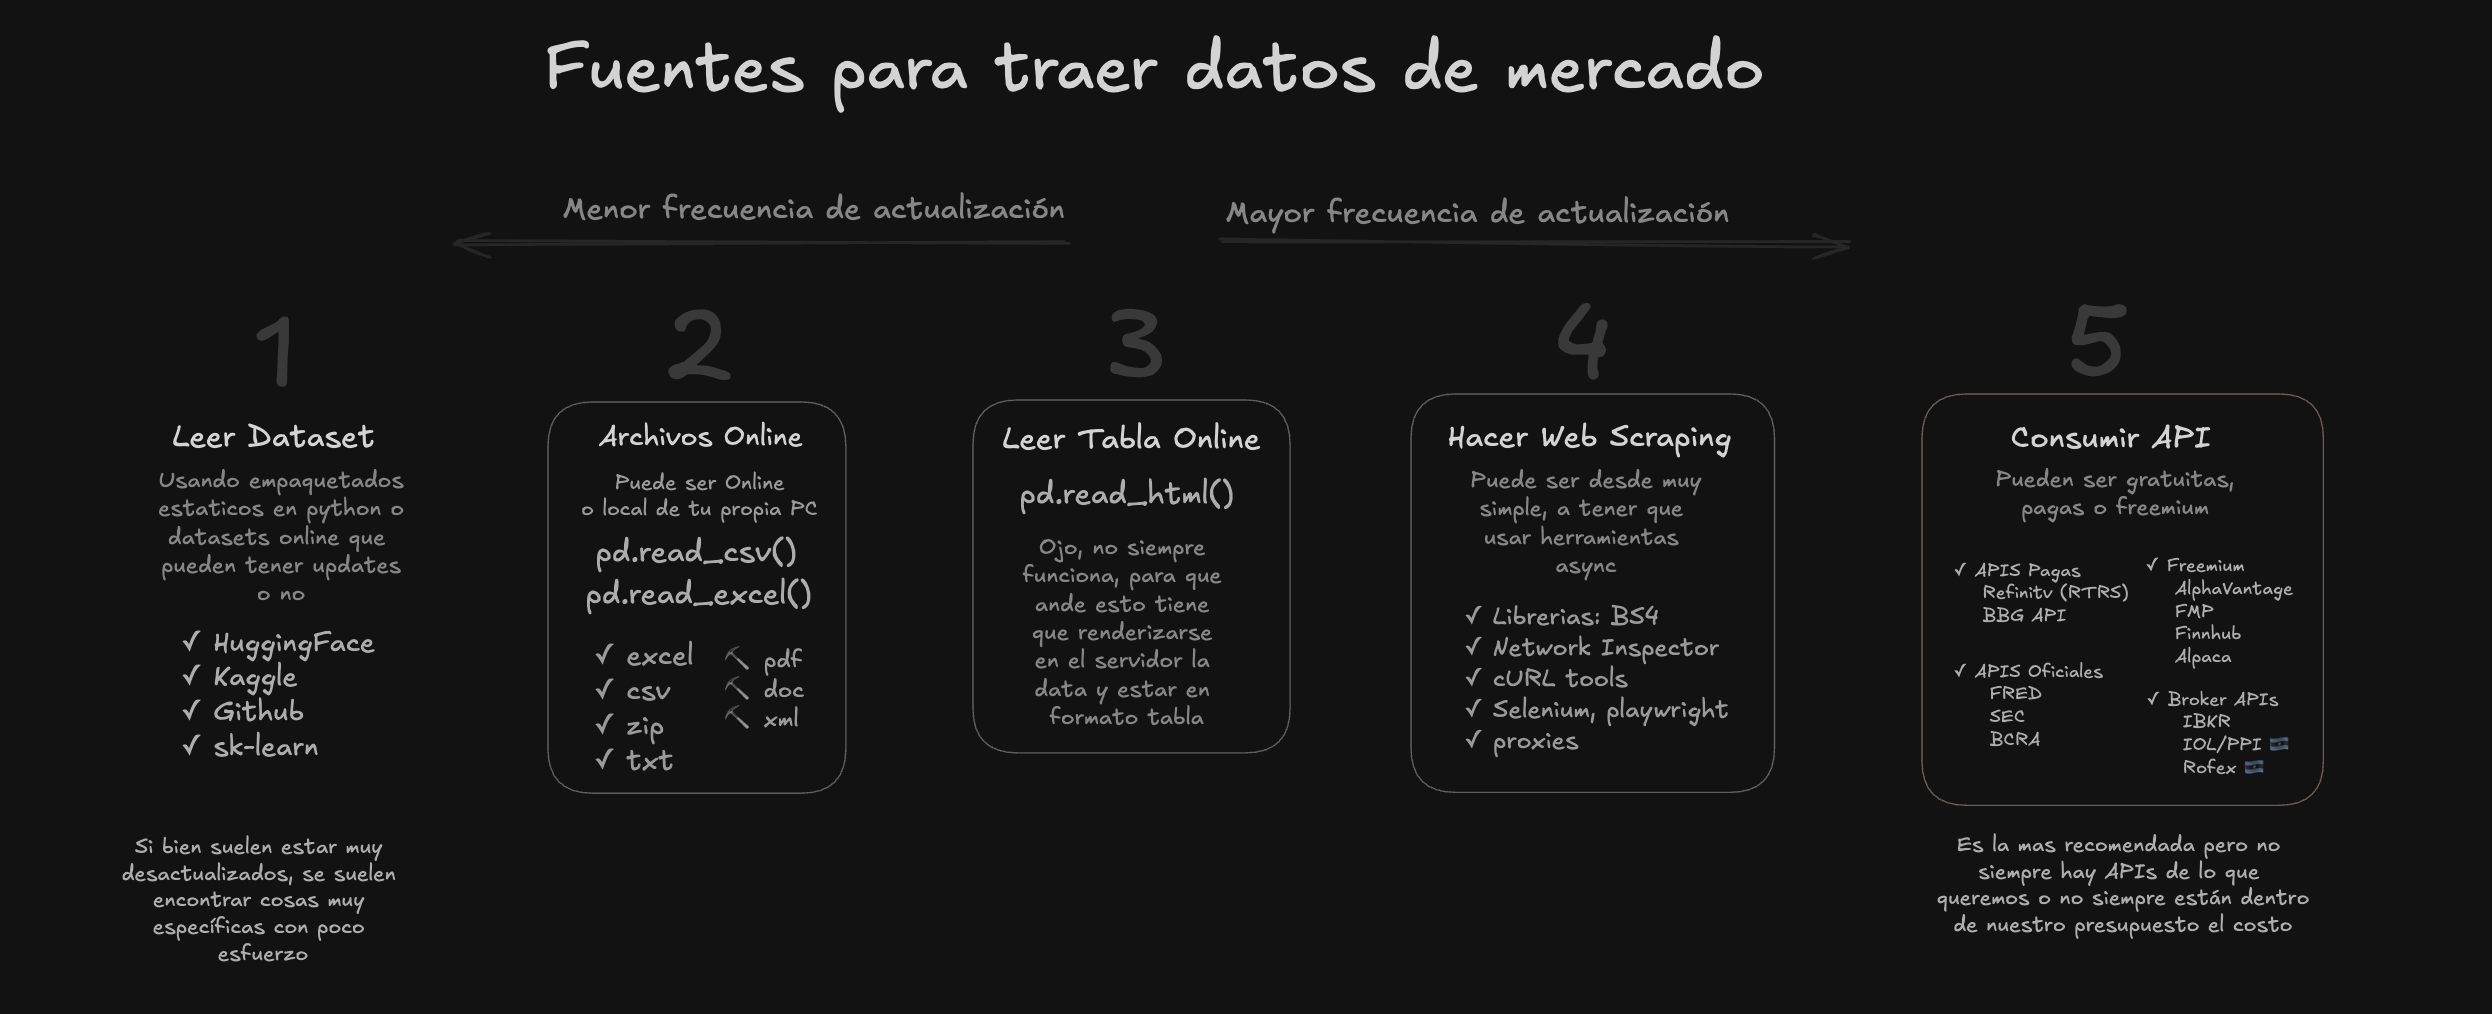

# 1 - Lectura de Datasets

## Ejemplo con dataset de seaborn, Dow Jones 1914-1968

In [ ]:
import seaborn as sns

df = sns.load_dataset("dowjones")
df

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45
...,...,...
644,1968-08-01,883.72
645,1968-09-01,922.80
646,1968-10-01,955.47
647,1968-11-01,964.12


In [ ]:
#sns.get_dataset_names()

## Interactividad de dataframes

In [ ]:
from google.colab import sheets

sh = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1KIp2s4E74RwjpMINniysMB349msKr8UUVtZnPnhERGw/edit#gid=0


## Ejemplo HuggingFace

https://huggingface.co/datasets?sort=trending&search=sp500

In [ ]:
# Debe instalarse datasets y reiniciar session

In [ ]:
!pip install datasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12

In [ ]:
from datasets import load_dataset
import pandas as pd

id = "gauss314/options-IV-SP500"
data_iv = load_dataset(id)
df_iv = pd.DataFrame(data_iv['train'][:])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.77k [00:00<?, ?B/s]

data_IV_USA.csv:   0%|          | 0.00/523M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3161661 [00:00<?, ? examples/s]

In [ ]:
df_iv

In [ ]:
df_iv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3161661 entries, 0 to 3161660
Data columns (total 26 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   symbol                  object 
 2   date                    object 
 3   strikes_spread          float64
 4   calls_contracts_traded  int64  
 5   puts_contracts_traded   int64  
 6   calls_open_interest     int64  
 7   puts_open_interest      int64  
 8   expirations_number      int64  
 9   DITM_IV                 float64
 10  ITM_IV                  float64
 11  sITM_IV                 float64
 12  ATM_IV                  float64
 13  sOTM_IV                 float64
 14  OTM_IV                  float64
 15  DOTM_IV                 float64
 16  contracts_number        int64  
 17  hv_20                   float64
 18  hv_40                   float64
 19  hv_60                   float64
 20  hv_75                   float64
 21  hv_90                   float64

In [ ]:
df_iv.groupby("symbol").ATM_IV.mean()

,ATM_IV
symbol,
A,29.885219
AA,59.320216
AABA,34.598966
AAC,43.214771
AAL,61.609989
...,...
ZTO,42.693010
ZTS,27.765923
ZUMZ,53.132038


# 2 - Lectura Bajando un file (CSV/EXCEL)

## SP500 retornos reales, Dividendos, CPI, PE, desde 1871 a 2018

In [ ]:
import pandas as pd

In [ ]:
sp500_monthly = pd.read_csv('https://r2.datahub.io/clv1551hg0004mj09hjz069e9/main/raw/data/data.csv')
sp500_monthly

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.440000,0.26,0.40,12.46,5.32,109.05,6.39,9.82,0.00
1,1871-02-01,4.500000,0.26,0.40,12.84,5.32,107.25,6.20,9.53,0.00
2,1871-03-01,4.610000,0.26,0.40,13.03,5.33,108.27,6.11,9.39,0.00
3,1871-04-01,4.740000,0.26,0.40,12.56,5.33,115.54,6.34,9.75,0.00
4,1871-05-01,4.860000,0.26,0.40,12.27,5.33,121.22,6.48,9.98,0.00
...,...,...,...,...,...,...,...,...,...,...
1828,2023-05-01,4146.173182,68.54,179.17,304.13,3.57,4173.45,68.99,180.35,31.14
1829,2023-06-01,4345.372857,68.71,181.17,305.11,3.75,4359.88,68.94,181.77,32.41
1830,2023-07-01,4508.075500,0.00,0.00,305.69,3.90,4514.51,0.00,0.00,33.38
1831,2023-08-01,4457.358696,0.00,0.00,305.98,4.17,4459.48,0.00,0.00,32.91


In [ ]:
sp500_monthly.to_csv("sp500_monthly.csv")

In [ ]:
pd.read_csv('sp500_monthly.csv')

,Unnamed: 0,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,0,1871-01-01,4.440000,0.26,0.40,12.46,5.32,109.05,6.39,9.82,0.00
1,1,1871-02-01,4.500000,0.26,0.40,12.84,5.32,107.25,6.20,9.53,0.00
2,2,1871-03-01,4.610000,0.26,0.40,13.03,5.33,108.27,6.11,9.39,0.00
3,3,1871-04-01,4.740000,0.26,0.40,12.56,5.33,115.54,6.34,9.75,0.00
4,4,1871-05-01,4.860000,0.26,0.40,12.27,5.33,121.22,6.48,9.98,0.00
...,...,...,...,...,...,...,...,...,...,...,...
1828,1828,2023-05-01,4146.173182,68.54,179.17,304.13,3.57,4173.45,68.99,180.35,31.14
1829,1829,2023-06-01,4345.372857,68.71,181.17,305.11,3.75,4359.88,68.94,181.77,32.41
1830,1830,2023-07-01,4508.075500,0.00,0.00,305.69,3.90,4514.51,0.00,0.00,33.38
1831,1831,2023-08-01,4457.358696,0.00,0.00,305.98,4.17,4459.48,0.00,0.00,32.91


In [ ]:
sp500_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1768 non-null   object 
 1   SP500                 1768 non-null   float64
 2   Dividend              1767 non-null   float64
 3   Earnings              1764 non-null   float64
 4   Consumer Price Index  1768 non-null   float64
 5   Long Interest Rate    1768 non-null   float64
 6   Real Price            1768 non-null   float64
 7   Real Dividend         1767 non-null   float64
 8   Real Earnings         1764 non-null   float64
 9   PE10                  1648 non-null   float64
dtypes: float64(9), object(1)
memory usage: 138.2+ KB


El PE10, o CAPE (Cyclically Adjusted Price-to-Earnings Ratio), fue idea de Robert J. Shiller

Es una versión ajustada del ratio Precio-Ganancias (P/E ratio), que mete un suavizado de 10 años ajustando por inflacion tanto el precio como las ganancias

## Shiller data (Update actualizado)

En 2013 se otorga el nobel de economia a 3 sujetos con ideas opuestas y complementarias para el abordaje de los sistemas financieros

  * Robert Shiller. (Conductualismo)
  * Eugene Fama.  (Mercados eficientes)
  * Lars Hansen. (Estadistica y proyeccion)

https://shillerdata.com/

In [ ]:
url = "https://img1.wsimg.com/blobby/go/e5e77e0b-59d1-44d9-ab25-4763ac982e53/downloads/ie_data.xls?ver=1721057088918"

col_names = [
    "Date",
    "IndexPrice",
    "Dividend",
    "Earnings",
    "CPI",
    "DateFraction",
    "InterestRate",
    "RealPrice",
    "RealDividend",
    "RealReturnsPrice",
    "RealEarnings",
    "RealReturnsPriceScaledEarnings",
    "Adj_PE10_CAPE",
    "drop_col_1",
    "RealReturnsPriceScaledEarnings_CAPE",
    "drop_col_2",
    "Excess_CAPE_yield",
    "MonthlyRealTotalBonsReturn",
    "RealRealTotal_bonsReturn",
    "Annual_10yrStocksReturn",
    "Annual_10yrBondsReturn",
    "Total_10yrExcessReturns",
]
data = pd.read_excel(url, sheet_name="Data", skiprows=8, names=col_names, skipfooter=1)
data = data.drop(['drop_col_1','drop_col_2'],axis=1)
data.index = pd.to_datetime(data.Date.astype(str), format="%Y.%m")
data

,Date,IndexPrice,Dividend,Earnings,CPI,DateFraction,InterestRate,RealPrice,RealDividend,RealReturnsPrice,RealEarnings,RealReturnsPriceScaledEarnings,Adj_PE10_CAPE,RealReturnsPriceScaledEarnings_CAPE,Excess_CAPE_yield,MonthlyRealTotalBonsReturn,RealRealTotal_bonsReturn,Annual_10yrStocksReturn,Annual_10yrBondsReturn,Total_10yrExcessReturns
Date,,,,,,,,,,,,,,,,,,,,
1871-02-01,1871.02,4.500000,0.260000,0.40,12.844641,1871.125000,5.323333,110.292054,6.372430,1.108231e+02,9.803738,9.850941,NaN,NaN,NaN,1.004180,0.974424,0.130858,0.094635,0.036224
1871-03-01,1871.03,4.610000,0.260000,0.40,13.034972,1871.208333,5.326667,111.338283,6.279383,1.124002e+02,9.660589,9.752725,NaN,NaN,NaN,1.004183,0.964209,0.130951,0.096186,0.034765
1871-04-01,1871.04,4.740000,0.260000,0.40,12.559226,1871.291667,5.330000,118.814418,6.517247,1.204959e+02,10.026533,10.168429,NaN,NaN,NaN,1.004185,1.004919,0.122056,0.090972,0.031084
1871-05-01,1871.05,4.860000,0.260000,0.40,12.273812,1871.375000,5.333333,124.655232,6.668798,1.269829e+02,10.259690,10.451272,NaN,NaN,NaN,1.004188,1.032591,0.122638,0.089488,0.033150
1871-06-01,1871.06,4.820000,0.260000,0.40,12.083481,1871.458333,5.336667,125.576585,6.773841,1.284965e+02,10.421293,10.663613,NaN,NaN,NaN,1.004191,1.053249,0.123093,0.087725,0.035368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,2024.05,5235.225455,71.592142,194.97,314.069000,2024.375000,4.480000,5247.639714,71.761908,3.488534e+06,195.432331,129919.794395,33.773635,36.428997,0.012974,1.017432,38.355981,NaN,NaN,NaN
2024-06-01,2024.06,5415.140526,71.975800,196.76,314.175000,2024.458333,4.310000,5426.150062,72.122134,3.611200e+06,197.160033,131213.514203,34.810549,37.531221,0.013636,1.008440,39.011438,NaN,NaN,NaN
2024-07-01,2024.07,5538.004545,NaN,NaN,314.540000,2024.541667,4.250000,5542.824374,NaN,3.688848e+06,NaN,NaN,35.443553,38.154900,0.013882,1.034795,39.295042,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1842 entries, 1871-02-01 to 2024-07-01
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     1842 non-null   float64
 1   Stock_returns                            1842 non-null   float64
 2   Dividend                                 1841 non-null   float64
 3   Earnings                                 1838 non-null   float64
 4   CPI                                      1842 non-null   float64
 5   Date_fraction                            1842 non-null   float64
 6   Long_interest_rate                       1842 non-null   float64
 7   Real_price                               1842 non-null   float64
 8   Real_dividend                            1841 non-null   float64
 9   Real_returns_price                       1842 non-null   float64
 10  Real_earnings                 

Para tener el dataset limpio solo los datos base para calcular ustedes y automaticamente actualizado con:

  - Valor indice (SP500 o equivalente acciones anteriores)
  - Dividendos nominales
  - Earnings de las empresas nominales
  - CPI para ajustar por inflacion
  - Tasa USA a 10 yr

https://colab.research.google.com/drive/1QWEFlWm9w10FCZUHNm5_CpDMqZMZ6Ht3?usp=sharing

## Lectura de data desde ZIP

https://github.com/gauss314/ucema

In [ ]:
import requests
import io
from zipfile import ZipFile

url = "https://github.com/gauss314/ucema/raw/main/opciones_hist_2020_Q1.zip"
r = requests.get(url)
zip_file = ZipFile(io.BytesIO(r.content))

# Esta linea es solo para extraer el nombre del archivo CSV dentro del ZIP
csv_file = zip_file.namelist()[0]

# Lee el archivo CSV con pandas
df = pd.read_csv(zip_file.open(csv_file))
df

,id,sigma10,sigma20,sigma40,sigma250,vi_ultima,vi_compra,vi_venta,strike,simbolo,...,subyacente,subyacente_precio,tipo,tiempo,ruedas_faltantes_opex,black_scholes,otm,valor_intrinseco,valor_extrinseco,fecha_negociado
0,273811,21,35,55,51,55.98,NaN,NaN,31.00,ALUC31.0FE,...,ALUA,32.4,Call,0.136986,36,4.343,-4,1.4,2.966,2019-12-27
1,273812,21,35,55,51,32.32,NaN,NaN,33.00,ALUC33.0AB,...,ALUA,32.4,Call,0.290411,76,5.385,2,NaN,4.000,2019-12-30
2,273813,21,35,55,51,46.22,NaN,NaN,33.00,ALUC33.0FE,...,ALUA,32.4,Call,0.136986,36,3.227,2,NaN,2.805,2019-12-30
3,273814,21,35,55,51,56.67,NaN,NaN,25.37,ALUV25.37F,...,ALUA,32.4,Put,0.136986,36,0.182,22,NaN,0.200,2019-12-30
4,273815,21,35,55,51,43.33,NaN,NaN,33.00,ALUV33.0FE,...,ALUA,32.4,Put,0.136986,36,2.054,-2,0.6,0.900,2019-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827628,1101439,236,198,143,74,97.25,NaN,NaN,960.00,YPFC960.JU,...,YPFD,345.5,Call,0.216438,57,12.090,178,NaN,1.553,2020-03-30
827629,1101440,236,198,143,74,129.13,NaN,NaN,300.00,YPFV300.AB,...,YPFD,345.5,Put,0.043836,12,18.334,13,NaN,15.167,2020-03-30
827630,1101441,236,198,143,74,132.78,NaN,NaN,400.00,YPFV400.AB,...,YPFD,345.5,Put,0.043836,12,72.811,-16,54.5,15.500,2020-03-30
827631,1101442,236,198,143,74,132.84,NaN,NaN,420.00,YPFV420.AB,...,YPFD,345.5,Put,0.043836,12,87.610,-22,74.5,10.500,2020-03-26


# 3 - Lectura de data desde tabla WEB

Este método sirve siempre y cuando:

  * La web se renderiza entera en el servidor (no se carga en forma asincrona)
  * Está la tabla como elemento <table> en el HTML

https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

In [ ]:
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

In [ ]:
sp500_tickers[1]

Date  Added                                Removed  \
                   Date Ticker                       Security  Ticker   
0        March 24, 2025   DASH                       DoorDash     BWA   
1        March 24, 2025    TKO             TKO Group Holdings     TFX   
2        March 24, 2025    WSM          Williams-Sonoma, Inc.      CE   
3        March 24, 2025    EXE                  Expand Energy     FMC   
4     December 23, 2024    APO       Apollo Global Management    QRVO   
..                  ...    ...                            ...     ...   
366   December 11, 1998   CPWR                      Compuware     SUN   
367       June 17, 1997    CCI  Countrywide Credit Industries     USL   
368  September 30, 1994    NCC                  National City     MCK   
369        July 1, 1976    BUD                 Anheuser Busch     HNG   
370        July 1, 1976    DIS        The Walt Disney Company     AYE   

                                                                     Reason  
                Security                                             Reason  
0             BorgWarner                   Market capitalization change.[4]  
1               Teleflex                   Market capitalization change.[4]  
2               Celanese                   Market capitalization change.[4]  
3        FMC Corporation                   Market capitalization change.[4]  
4                  Qorvo                   Market capitalization change.[5]  
..                   ...                                                ...  
366           SunAmerica                     AIG purchased SunAmerica.[261]  
367               USLife                          AIG acquired USLife.[262]  
368             McKesson  McKesson sold PCS Health Services to Eli Lilly...  
369  Houston Natural Gas  Major restructuring of S&P 500 to have fewer i...  
370     Allegheny Energy  Major restructuring of S&P 500 to have fewer i...  

[371 rows x 6 columns]

In [ ]:
sp500_tickers[0]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [ ]:
# La dejo picando para scraping

# Se puede buscar todos los balances por CIK directo de edgar, en este caso ABBV
url = "https://www.sec.gov/edgar/browse/?CIK=1551152"

## Ejemplo de SDK Que hacen wrapers .eyendo datos de la web

Es importante entender que hacen estos wrapers, basicamente webscraping, como el de yfinance (esto puede usar de fondo un API o no, ser mas rustico)

https://github.com/gauss314/secfi

In [ ]:
!pip install secfi -q

In [ ]:
import secfi
ciks = secfi.getCiks()
ciks

,cik_str,title,cik
ticker,,,
MSFT,789019,MICROSOFT CORP,0000789019
AAPL,320193,Apple Inc.,0000320193
NVDA,1045810,NVIDIA CORP,0001045810
AMZN,1018724,AMAZON COM INC,0001018724
GOOGL,1652044,Alphabet Inc.,0001652044
...,...,...,...
MDDNF,2063417,Meridian Energy Ltd/ADR,0002063417
SATLF,1679920,"Start Today Co., Ltd./ADR",0001679920
ELCPF,1039610,EDP ENERGIAS DE PORTUGAL SA,0001039610


In [ ]:
filings = secfi.getFils("AAPL")
filings

,filingDate,reportDate,form,filmNumber,size,isXBRL,url,acceptanceDateTime
0,2025-05-12,2025-05-05,8-K,25935352,887109,1,https://www.sec.gov/Archives/edgar/data/000032...,2025-05-12T20:30:28.000Z
1,2025-05-06,,424B2,25917774,734021,1,https://www.sec.gov/Archives/edgar/data/000032...,2025-05-06T20:31:12.000Z
2,2025-05-06,,FWP,25914799,67181,0,https://www.sec.gov/Archives/edgar/data/000032...,2025-05-06T00:58:13.000Z
3,2025-05-05,,424B2,25911009,509849,0,https://www.sec.gov/Archives/edgar/data/000032...,2025-05-05T12:16:54.000Z
4,2025-05-02,2025-03-29,10-Q,25905357,5299807,1,https://www.sec.gov/Archives/edgar/data/000032...,2025-05-02T10:00:46.000Z
...,...,...,...,...,...,...,...,...
996,2014-10-21,2014-10-17,4,,7828,0,https://www.sec.gov/Archives/edgar/data/000032...,2014-10-21T22:33:30.000Z
997,2014-10-20,2014-10-20,8-K,141164188,168003,0,https://www.sec.gov/Archives/edgar/data/000032...,2014-10-20T20:30:39.000Z
998,2014-10-17,2014-10-15,4,,8571,0,https://www.sec.gov/Archives/edgar/data/000032...,2014-10-17T22:34:38.000Z
999,2014-10-17,2014-10-15,4,,10839,0,https://www.sec.gov/Archives/edgar/data/000032...,2014-10-17T22:34:04.000Z


# 5 - APIs

Este es un tema de la clase que viene, pero para tener para trabajar usaremos un wrapper del API gratuito de yahoo finance (que aun funciona) para traer datos de mercado actuales que como vemos trae los datos ya en un dataframe

In [ ]:
import yfinance as yf

In [ ]:
ggal = yf.download('GGAL', auto_adjust=True, start='2010-01-01')
ggal

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GGAL,GGAL,GGAL,GGAL,GGAL
Date,,,,,
2010-01-04,4.420453,4.466260,4.305933,4.397549,77100
2010-01-05,4.573146,4.580781,4.420453,4.420453,165900
2010-01-06,4.298300,4.580781,4.267761,4.580781,239700
2010-01-07,4.450992,4.458626,4.221953,4.221953,94100
2010-01-08,4.374646,4.466262,4.199050,4.466262,136000
...,...,...,...,...,...
2025-05-08,58.430000,59.450001,57.110001,59.130001,1231800
2025-05-09,58.810001,60.980000,58.270000,58.500000,1506700


In [ ]:
# Si no les anda yfinance, ejecuten una sola vez el codigo comentado de abajo, y listo, queda el notebook "habilitado" para usarlo todo lo que quieran

In [ ]:
# !pip install curl_cffi -q
# from cachetools import TTLCache
# from curl_cffi import requests as curl_requests

# data_cache = TTLCache(maxsize=100, ttl=60 * 60)
# session = curl_requests.Session(impersonate="chrome")

# def yfd(firms, start="2025-01-01", end=None):
#     tickers = firms if isinstance(firms, (list, tuple)) else [firms]
#     key = (tuple(tickers), start, end)
#     if key in data_cache:
#         return data_cache[key]
#     df = yf.download(tickers=tickers, start=start, end=end, session=session)
#     df.index.name = 'Date'
#     data_cache[key] = df
#     return df

# yfd('GGAL')

# PANDAS

## Metodos loc e iloc

Diferencia entre loc e iloc

* loc se refiere a "nombres", "etiquetas"
* iloc se refiere a "indices", "ubicaciones"

In [ ]:
acciones_list = [{'Ticker':'GGAL','Nombre':'Banco Galicia','Pais':'Argentina','Rubro':'Bancos'},
                 {'Ticker':'PAMP','Nombre':'Pampa Energía','Pais':'Argentina','Rubro':'Energéticas'},
                 {'Ticker':'MSFT','Nombre':'Microsoft','Pais':'USA','Rubro':'Tecnológicas'},
                 {'Ticker':'BABA','Nombre':'Alibaba','Pais':'China','Rubro':'Consumo'}]

acciones = pd.DataFrame(acciones_list).set_index('Ticker')
acciones

,Nombre,Pais,Rubro
Ticker,,,
GGAL,Banco Galicia,Argentina,Bancos
PAMP,Pampa Energía,Argentina,Energéticas
MSFT,Microsoft,USA,Tecnológicas
BABA,Alibaba,China,Consumo


#### Filtros solo de filas

In [ ]:
acciones.iloc[0:2, -2:]

,Pais,Rubro
Ticker,,
GGAL,Argentina,Bancos
PAMP,Argentina,Energéticas


In [ ]:
acciones.loc['GGAL':'MSFT', ["Pais", "Rubro"]]

,Pais,Rubro
Ticker,,
GGAL,Argentina,Bancos
PAMP,Argentina,Energéticas
MSFT,USA,Tecnológicas


#### Filtros de filas y columnas

In [ ]:
# Ej. Las ultimas 2 filas, la ultima columna
acciones.iloc[-2:, -1]

Ticker
MSFT    Tecnológicas
BABA         Consumo
Name: Rubro, dtype: object

In [ ]:
# Ej. Desde GGAL hasta PAMP, las columnas, Nombre y Rubro.
acciones.loc['GGAL':'PAMP', ['Nombre','Rubro']]

,Nombre,Rubro
Ticker,,
GGAL,Banco Galicia,Bancos
PAMP,Pampa Energía,Energéticas


In [ ]:
acciones_list = [{'Ticker':'GGAL','Nombre':'Banco Galicia','Pais':'Argentina','Rubro':'Bancos'},
                 {'Ticker':'PAMP','Nombre':'Pampa Energía','Pais':'Argentina','Rubro':'Energéticas'},
                 {'Ticker':'MSFT','Nombre':'Microsoft','Pais':'USA','Rubro':'Tecnológicas'},
                 {'Ticker':'BABA','Nombre':'Alibaba','Pais':'China','Rubro':'Consumo'}]

acciones = pd.DataFrame(acciones_list)
acciones

,Ticker,Nombre,Pais,Rubro
0,GGAL,Banco Galicia,Argentina,Bancos
1,PAMP,Pampa Energía,Argentina,Energéticas
2,MSFT,Microsoft,USA,Tecnológicas
3,BABA,Alibaba,China,Consumo


In [ ]:
acciones.iloc[:2] # Aca selecciono hasta el indice 2

,Ticker,Nombre,Pais,Rubro
0,GGAL,Banco Galicia,Argentina,Bancos
1,PAMP,Pampa Energía,Argentina,Energéticas


In [ ]:
# las coincidencias de etiquetas las toma como strings exactos, o sea inclusive
acciones.loc[:2]  # Aca selecciono hasta la etiqueta 2

,Ticker,Nombre,Pais,Rubro
0,GGAL,Banco Galicia,Argentina,Bancos
1,PAMP,Pampa Energía,Argentina,Energéticas
2,MSFT,Microsoft,USA,Tecnológicas


## Set index

In [ ]:
import pandas as pd

sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [ ]:
sp500_tickers

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [ ]:
#sp500_tickers = sp500_tickers.set_index('Symbol')
sp500_tickers.set_index('Symbol', inplace=True)

In [ ]:
sp500_tickers # Si no se hace la asignacion no queda guardado el seteo

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [ ]:
sp500_tickers

,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
Symbol,,,,,,,
MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...
XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969


## Creacion de nuevas columnas

### Ejercicio
Bajar los datos de AAPL

Crear una nueva columna con el color de la vela diaria
* Verde si Close > Open
* Rojo si Close < Open
* Doji, si Close = Open

In [ ]:
import yfinance as yf

data_mi = yf.download(['AAPL',"AMZN"], start='2001-01-01', auto_adjust=True)
data_mi

[*********************100%***********************]  2 of 2 completed


Price            Close                    High              ...        Open  \
Ticker            AAPL        AMZN        AAPL        AMZN  ...        AAPL   
Date                                                        ...               
2001-01-02    0.223528    0.693750    0.229163    0.800000  ...    0.223528   
2001-01-03    0.246069    0.878125    0.250764    0.893750  ...    0.217893   
2001-01-04    0.256400    0.775000    0.278001    0.878125  ...    0.272601   
2001-01-05    0.246069    0.728125    0.261096    0.793750  ...    0.254521   
2001-01-08    0.248886    0.746875    0.255225    0.778125  ...    0.254521   
...                ...         ...         ...         ...  ...         ...   
2025-05-08  197.231369  192.080002  199.788014  194.330002  ...  197.461064   
2025-05-09  198.270004  193.059998  200.277366  194.690002  ...  198.739390   
2025-05-12  210.789993  208.639999  211.270004  211.660004  ...  210.970001   
2025-05-13  212.929993  211.369995  213.399994  214.839996  ...  210.429993   
2025-05-14  212.330002  210.250000  213.940002  211.929993  ...  212.425003   

Price                      Volume             
Ticker            AMZN       AAPL       AMZN  
Date                                          
2001-01-02    0.790625  452312000  184070000  
2001-01-03    0.681250  817073600  293608000  
2001-01-04    0.850000  739396000  212410000  
2001-01-05    0.775000  412356000  175976000  
2001-01-08    0.721875  373699200  208894000  
...                ...        ...        ...  
2025-05-08  191.429993   50478900   41043600  
2025-05-09  193.380005   36453900   29663100  
2025-05-12  210.710007   63775800   75205000  
2025-05-13  211.080002   51909300   56193700  
2025-05-14  211.410004   49117576   37888574  

[6128 rows x 10 columns]

In [ ]:
data_mi["Close"]

Ticker,AAPL,AMZN
Date,,
2001-01-02,0.223528,0.693750
2001-01-03,0.246069,0.878125
2001-01-04,0.256400,0.775000
2001-01-05,0.246069,0.728125
2001-01-08,0.248886,0.746875
...,...,...
2025-05-08,197.231369,192.080002
2025-05-09,198.270004,193.059998
2025-05-12,210.789993,208.639999


In [ ]:
data_mi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6128 entries, 2001-01-02 to 2025-05-14
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   6128 non-null   float64
 1   (High, AAPL)    6128 non-null   float64
 2   (Low, AAPL)     6128 non-null   float64
 3   (Open, AAPL)    6128 non-null   float64
 4   (Volume, AAPL)  6128 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 287.2 KB


In [ ]:
data = data_mi.swaplevel(0,1, axis=1)['AAPL']
data

Price,Close,High,Low,Open,Volume
Date,,,,,
2001-01-02,0.223528,0.229163,0.218832,0.223528,452312000
2001-01-03,0.246069,0.250764,0.216954,0.217893,817073600
2001-01-04,0.256400,0.278001,0.252643,0.272601,739396000
2001-01-05,0.246069,0.261096,0.241372,0.254521,412356000
2001-01-08,0.248886,0.255225,0.239494,0.254521,373699200
...,...,...,...,...,...
2025-05-08,197.231369,199.788014,194.425036,197.461064,50478900
2025-05-09,198.270004,200.277366,197.281295,198.739390,36453900
2025-05-12,210.789993,211.270004,206.750000,210.970001,63775800


## Modo iterativo

In [ ]:
%%time
colors = []
for i in range(len(data)):

    if data.iloc[i]['Close'] > data.iloc[i]['Open']:
        colors.append("verde")

    elif data.iloc[i]['Close'] == data.iloc[i]['Open']:
        colors.append("doji")

    else:
        colors.append("roja")


data['Color'] = colors
data

CPU times: user 1.26 s, sys: 4.84 ms, total: 1.27 s
Wall time: 1.31 s


Price,Close,High,Low,Open,Volume,Color
Date,,,,,,
2001-01-02,0.223528,0.229163,0.218832,0.223528,452312000,doji
2001-01-03,0.246069,0.250765,0.216954,0.217893,817073600,verde
2001-01-04,0.256400,0.278001,0.252643,0.272601,739396000,roja
2001-01-05,0.246069,0.261096,0.241372,0.254521,412356000,roja
2001-01-08,0.248886,0.255225,0.239494,0.254521,373699200,roja
...,...,...,...,...,...,...
2025-05-08,197.231369,199.788014,194.425036,197.461064,50478900,roja
2025-05-09,198.270004,200.277366,197.281295,198.739390,36453900,roja
2025-05-12,210.789993,211.270004,206.750000,210.970001,63775800,roja


## Modo matricial

In [ ]:
%%time
mask_verde = data['Close'] > data['Open']
mask_roja = data['Close'] < data['Open']
mask_doji = data['Close'] == data['Open']

data.loc[mask_verde, 'Color'] = 'verde'  # esto es como decirle que localice todos los que son TRUE en mask_verde
data.loc[mask_roja, 'Color'] = 'roja'
data.loc[mask_doji, 'Color'] = 'doji'
data

CPU times: user 3.28 ms, sys: 967 µs, total: 4.24 ms
Wall time: 5.76 ms


Price,Close,High,Low,Open,Volume,Color
Date,,,,,,
2001-01-02,0.223528,0.229163,0.218832,0.223528,452312000,doji
2001-01-03,0.246069,0.250764,0.216954,0.217893,817073600,verde
2001-01-04,0.256400,0.278001,0.252643,0.272601,739396000,roja
2001-01-05,0.246069,0.261096,0.241372,0.254521,412356000,roja
2001-01-08,0.248886,0.255225,0.239494,0.254521,373699200,roja
...,...,...,...,...,...,...
2025-05-08,197.231369,199.788014,194.425036,197.461064,50478900,roja
2025-05-09,198.270004,200.277366,197.281295,198.739390,36453900,roja
2025-05-12,210.789993,211.270004,206.750000,210.970001,63775800,roja


In [ ]:
data.dropna(subset="Color")

Price,Close,High,Low,Open,Volume,Color
Date,,,,,,
2001-01-03,0.246069,0.250764,0.216954,0.217893,817073600,verde
2001-01-04,0.256400,0.278001,0.252643,0.272601,739396000,roja
2001-01-05,0.246069,0.261096,0.241372,0.254521,412356000,roja
2001-01-08,0.248886,0.255225,0.239494,0.254521,373699200,roja
2001-01-09,0.258278,0.265087,0.248886,0.252643,588929600,verde
...,...,...,...,...,...,...
2025-05-08,197.231369,199.788014,194.425036,197.461064,50478900,roja
2025-05-09,198.270004,200.277366,197.281295,198.739390,36453900,roja
2025-05-12,210.789993,211.270004,206.750000,210.970001,63775800,roja


In [ ]:
mask_verde

,0
Date,
2001-01-02,False
2001-01-03,True
2001-01-04,False
2001-01-05,False
2001-01-08,False
...,...
2025-05-08,False
2025-05-09,False
2025-05-12,False


## Orden

In [ ]:
data["year"] = data.index.year
data["d_ret"] = data["Close"].pct_change()
data.sort_values('Volume', ascending=False)

Price,Close,High,Low,Open,Volume,Color,year,d_ret
Date,,,,,,,,
2008-01-23,4.179635,4.207585,3.791034,4.093079,3372969600,verde,2008,-0.106464
2007-01-09,2.782115,2.794438,2.559113,2.598184,3349298400,verde,2007,0.083070
2005-01-13,1.048892,1.118317,1.047840,1.107647,3164716800,roja,2005,0.066300
2007-01-10,2.915257,2.939299,2.808564,2.847635,2952880000,verde,2007,0.047856
2004-10-14,0.675918,0.687489,0.639402,0.649020,2768427200,verde,2004,0.131573
...,...,...,...,...,...,...,...,...
2024-10-10,228.237701,228.696097,226.374257,226.982120,28183500,verde,2024,-0.002178
2024-11-05,222.667297,223.165546,220.365391,221.023083,28111300,verde,2024,0.006486
2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100,verde,2024,0.003176


## Agrupamiento

In [ ]:
data.groupby(["year",'Color']).Volume.mean()

year  Color
2001  doji     3.097509e+08
      roja     3.592082e+08
      verde    4.032277e+08
2002  doji     2.775752e+08
      roja     3.078006e+08
                   ...     
2024  roja     5.990582e+07
      verde    5.479488e+07
2025  doji     4.024410e+07
      roja     6.221411e+07
      verde    5.676010e+07
Name: Volume, Length: 62, dtype: float64

In [ ]:
data.groupby('Color').Volume.count()

,Volume
Color,
doji,16
roja,2934
verde,3178


In [ ]:
data.groupby('Color').d_ret.median().mul(100)

,d_ret
Color,
doji,-0.034270
roja,-0.875732
verde,1.076190


In [ ]:
data.groupby('Color').mean()

Price,Close,High,Low,Open,Volume
Color,,,,,
doji,35.801113,36.018603,35.542760,35.801113,3.101346e+08
roja,43.431150,44.141162,43.186792,43.901461,3.897000e+08
verde,47.523308,47.751376,46.771564,47.013375,3.661975e+08


### Ejercicio aplicacion



>  Para GGAL, calcular que % de las ruedas son velas rojas, del top 200 de mayor volumen historico en USD

>  Calcular luego el % de Verdes, Rojas y Dojis de todo el historico


### Ejercicio (probar con chatGPT)

> Descargar los precios historicos de MSFT desde 2010 y calcular la volatilidad intradiaria segun el color de la vela

> Tomar los dias neutros como vela verde. Es decir quiero saber si los dias de velas verde o roja cambia la volatilidad intradiaria esperada

## Guardado de dataframes a excel o csv

In [ ]:
data = yf.download('GOOG')

mask_verde = data['Close'] > data['Open']
mask_roja = data['Close'] < data['Open']
mask_doji = data['Close'] == data['Open']

data.loc[mask_verde, 'Color'] = 'verde'
data.loc[mask_roja, 'Color'] = 'roja'
data.loc[mask_doji, 'Color'] = 'doji'

data.to_excel('data_goog_excel.xlsx')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.to_csv('data_goog_excel.csv')

## Ranks

In [ ]:
import yfinance as yf
data = yf.download('GGAL')
data['variacion'] = data['Close'].pct_change()*100
data = data.dropna()
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,variacion
Ticker,GGAL,GGAL,GGAL,GGAL,GGAL,
Date,,,,,,
2000-07-26,13.026934,13.073458,12.794310,12.840835,28900,0.000000
2000-07-27,13.026934,13.119983,12.933884,13.026934,61200,0.000000
2000-07-28,12.933882,13.073456,12.747783,13.073456,146100,-0.714304
2000-07-31,13.166505,13.166505,12.561683,13.026931,178400,1.798556
2000-08-01,13.026934,13.724805,12.840835,13.073458,87400,-1.060047
...,...,...,...,...,...,...
2025-05-08,58.430000,59.450001,57.110001,59.130001,1231800,0.137107
2025-05-09,58.810001,60.980000,58.270000,58.500000,1506700,0.650353


In [ ]:
df = data.copy()
df['variacion_ranking'] = data.variacion.rank()
df

Price,Close,High,Low,Open,Volume,variacion,variacion_ranking
Ticker,GGAL,GGAL,GGAL,GGAL,GGAL,,
Date,,,,,,,
2000-07-26,13.026934,13.073458,12.794310,12.840835,28900,0.000000,3096.0
2000-07-27,13.026934,13.119983,12.933884,13.026934,61200,0.000000,3096.0
2000-07-28,12.933882,13.073456,12.747783,13.073456,146100,-0.714304,2422.0
2000-07-31,13.166505,13.166505,12.561683,13.026931,178400,1.798556,4631.0
2000-08-01,13.026934,13.724805,12.840835,13.073458,87400,-1.060047,2118.0
...,...,...,...,...,...,...,...
2025-05-08,58.430000,59.450001,57.110001,59.130001,1231800,0.137107,3243.0
2025-05-09,58.810001,60.980000,58.270000,58.500000,1506700,0.650353,3758.0


In [ ]:
df.sort_values('variacion_ranking', ascending=True).head(10)

Price,Close,High,Low,Open,Volume,variacion,variacion_ranking
Ticker,GGAL,GGAL,GGAL,GGAL,GGAL,,
Date,,,,,,,
2002-08-27,0.197355,0.576885,0.189765,0.576885,258200,-65.789476,1.0
2019-08-12,13.347078,15.426833,12.088070,15.386990,30223700,-56.117372,2.0
2002-06-17,0.166993,0.242899,0.166993,0.242899,632100,-31.250012,3.0
2008-10-21,1.702524,2.282756,1.694889,2.282756,469300,-23.890782,4.0
2002-02-01,1.723064,2.125365,1.662339,2.125365,743800,-23.050873,5.0
2020-03-16,5.689442,6.844861,5.657569,6.151610,2177100,-22.475567,6.0
2020-03-18,4.844790,5.657568,4.693391,5.506168,2319500,-20.418846,7.0
2001-09-17,5.579083,6.452001,5.571493,6.452001,406700,-20.108715,8.0


### Ranks "percentiles"

In [ ]:
import yfinance as yf
data = yf.download('GGAL')
data['variacion'] = data['Close'].pct_change() *100
data.dropna(inplace=True)
data['variacion_ranking'] = data.variacion.rank()

data['variacion_ranking_pct'] = data.variacion.rank(pct=True)
data.sort_values('variacion_ranking')

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,variacion,variacion_ranking,variacion_ranking_pct
Ticker,GGAL,GGAL,GGAL,GGAL,GGAL,,,
Date,,,,,,,,
2002-08-27,0.197355,0.576885,0.189765,0.576885,258200,-65.789473,1.0,0.000160
2019-08-12,13.347079,15.426834,12.088071,15.386991,30223700,-56.117363,2.0,0.000321
2002-06-17,0.166993,0.242899,0.166993,0.242899,632100,-31.250018,3.0,0.000481
2008-10-21,1.702524,2.282757,1.694890,2.282757,469300,-23.890766,4.0,0.000641
2002-02-01,1.723064,2.125365,1.662339,2.125365,743800,-23.050852,5.0,0.000802
...,...,...,...,...,...,...,...,...
2002-06-19,0.258080,0.303624,0.182174,0.197355,1002300,41.666641,6234.0,0.999359
2002-02-28,1.138588,1.206904,0.850146,1.039911,1038800,45.631058,6235.0,0.999519


## Repaso de quantiles, cuartiles, quintiles, deciles, percentiles y blabla_iles

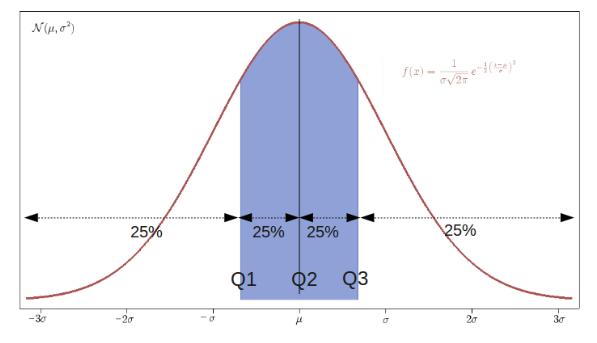

### Quantiles

In [ ]:
import yfinance as yf
data = yf.download('GGAL')
data['variacion'] = data['Close'].pct_change() *100
data.dropna(inplace=True)
data['variacion_ranking'] = data.variacion.rank()
data['variacion_ranking_pct'] = data.variacion.rank(pct=True)
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,variacion,variacion_ranking,variacion_ranking_pct
Ticker,GGAL,GGAL,GGAL,GGAL,GGAL,,,
Date,,,,,,,,
2000-07-26,13.026933,13.073457,12.794309,12.840834,28900,0.000000,3097.0,0.496473
2000-07-27,13.026933,13.119982,12.933883,13.026933,61200,0.000000,3097.0,0.496473
2000-07-28,12.933882,13.073456,12.747783,13.073456,146100,-0.714297,2422.0,0.388265
2000-07-31,13.166507,13.166507,12.561685,13.026932,178400,1.798571,4631.0,0.742385
2000-08-01,13.026933,13.724804,12.840834,13.073457,87400,-1.060069,2118.0,0.339532
...,...,...,...,...,...,...,...,...
2025-05-08,58.430000,59.450001,57.110001,59.130001,1231800,0.137107,3244.0,0.520038
2025-05-09,58.810001,60.980000,58.270000,58.500000,1506700,0.650353,3758.0,0.602437


In [ ]:
data.variacion.quantile(0.689965) # el valor de variacion para el cual estoy en el percentil dado, en este caso percentil 0.689..

1.3141693128950662

In [ ]:
data.variacion.quantile(0.025)

-7.107523157388941

### Ejercicio

    a - Traer los quantiles 0.05 y 0.95 de las variaciones diarias del SP500 desde el año 2005,
    b - Calcular el ratio del quantil 95 vs el 5 (en valor absoluto)
    c - Dar una interpretación de que significa el ratio
    d - Hacer el mismo cálculo para los siguientes tickers ['AAPL','AMZN','GOOGL','NFLX','GGAL','YPF','PAM']
    e - Sacar conclusiones
    
    f - ¿Que tipo de retornos debería tomar? ¿logaritmicos o lineales? ¿Por que?
    
    g- ¿Que pasa si quiero un ratio mas realista, es decir que contemple no solo los valores quantiles sino el agregado de toda una cola de la distribucion?  ¿Como debería hacer ese cálculo?

In [ ]:
import numpy as np
import yfinance as yf

# rachev

tickers = ['SPY','AAPL','AMZN','GOOGL','NFLX','GGAL','YPF','PAM']
data = yf.download(tickers, start='2005-01-01')['Close']
ret_log = np.log(data / data.shift())
ret_log.quantile(.95).divide(ret_log.quantile(.05)).abs().round(4)

[*********************100%***********************]  8 of 8 completed


,0
Ticker,
AAPL,1.0482
AMZN,1.0615
GGAL,1.0391
GOOGL,0.9682
NFLX,1.1144
PAM,1.0795
SPY,0.9127
YPF,1.0978


In [ ]:
ret_log

Ticker,AAPL,AMZN,GGAL,GOOGL,NFLX,PAM,SPY,YPF
Date,,,,,,,,
2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04,0.010218,-0.054941,-0.022796,-0.041344,-0.022054,NaN,-0.012295,-0.003466
2005-01-05,0.008720,-0.008819,-0.014670,-0.005103,-0.040250,NaN,-0.006924,0.001850
2005-01-06,0.000775,-0.017388,0.025533,-0.025966,-0.013484,NaN,0.005071,0.007596
2005-01-07,0.070282,0.030469,-0.021846,0.027722,0.006315,NaN,-0.001434,-0.000229
...,...,...,...,...,...,...,...,...
2025-05-08,0.006299,0.017700,0.001370,0.018976,-0.009549,0.009860,0.006944,0.018655
2025-05-09,0.005252,0.005089,0.006482,-0.009967,-0.003686,0.041684,-0.001275,0.058563
2025-05-12,0.061233,0.077609,0.047323,0.036700,-0.026861,0.074316,0.032513,0.083002


### Ideas para practicar

#### Hipótesis

> * Hay una variabildiad importante en los retornos en función del día de semana

#### Buscamos una lista de tickers

In [ ]:
import pandas as pd

sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_tickers = list(sp500.Symbol)
sp500_tickers = [e for e in sp500_tickers if e not in ('BRK.B','BF.B')]

print(sp500_tickers[:100])

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'APO', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BBY', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB']


#### Bajamos los cierres diarios de esos tickers

In [ ]:
%%time

import yfinance as yf
import numpy as np

tickers = sp500_tickers
cierres = yf.download(tickers, start='2000-01-01')['Close']

[*********************100%***********************]  501 of 501 completed


CPU times: user 1min 8s, sys: 3.66 s, total: 1min 12s
Wall time: 1min 39s


In [ ]:
pd.options.display.max_columns = 8
cierres

Ticker,A,AAPL,ABBV,ABNB,...,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,
2000-01-03,43.290871,0.841048,NaN,NaN,...,4.590250,NaN,25.027779,NaN
2000-01-04,39.983932,0.770139,NaN,NaN,...,4.497983,NaN,24.666668,NaN
2000-01-05,37.503727,0.781408,NaN,NaN,...,4.521046,NaN,25.138889,NaN
2000-01-06,36.075714,0.713787,NaN,NaN,...,4.482606,NaN,23.777779,NaN
2000-01-07,39.082039,0.747598,NaN,NaN,...,4.382649,NaN,23.513889,NaN
...,...,...,...,...,...,...,...,...,...
2025-05-08,108.699997,197.231369,185.580002,126.389999,...,147.979996,95.110001,265.369995,161.690002
2025-05-09,106.930000,198.270004,184.600006,127.040001,...,147.130005,95.209999,266.709991,159.270004
2025-05-12,115.550003,210.789993,190.070007,134.210007,...,146.800003,98.220001,300.109985,161.919998


#### Armamos una matriz de retornos y una de resumen

> ⚠️ Vamos a usar retornos logaritmicos para poder sacar promedios y que tenga sentido

In [ ]:
retornos = np.log((cierres/cierres.shift(1)))

mat_ret = retornos.groupby(retornos.index.dayofweek).mean()*250

mat_ret = mat_ret.clip(lower=-1, upper=1)
mat_ret.index = ['Lunes','Martes','Miercoles','Jueves','Viernes']
resumen = mat_ret.transpose()
resumen.describe()

,Lunes,Martes,Miercoles,Jueves,Viernes
count,501.000000,501.000000,501.000000,501.000000,501.000000
mean,-0.026013,0.179399,0.127014,0.125189,0.148894
std,0.213513,0.184479,0.179546,0.189934,0.186880
min,-1.000000,-1.000000,-0.777542,-1.000000,-0.548886
25%,-0.150403,0.074397,0.020153,0.023679,0.051958
50%,-0.018241,0.170159,0.103315,0.122309,0.148903
75%,0.097316,0.280796,0.216351,0.231362,0.236794
max,1.000000,1.000000,1.000000,0.969697,1.000000


In [ ]:
mat_ret

Ticker,A,AAPL,ABBV,ABNB,...,YUM,ZBH,ZBRA,ZTS
Lunes,-0.195345,0.688389,0.019762,-0.566081,...,0.048727,-0.173820,-0.115687,-0.193613
Martes,0.078449,0.217739,-0.052545,0.434462,...,0.129154,0.224676,0.267561,0.164014
Miercoles,-0.028681,0.289203,0.269792,-0.049350,...,0.195297,0.114807,0.083144,-0.003120
Jueves,0.166610,0.235844,0.151234,-0.337328,...,0.288032,-0.090527,0.120373,0.452669
Viernes,0.148903,-0.317731,0.459234,0.403882,...,0.007914,0.178014,0.113057,0.248266


In [ ]:
resumen

,Lunes,Martes,Miercoles,Jueves,Viernes
Ticker,,,,,
A,-0.195345,0.078449,-0.028681,0.166610,0.148903
AAPL,0.688389,0.217739,0.289203,0.235844,-0.317731
ABBV,0.019762,-0.052545,0.269792,0.151234,0.459234
ABNB,-0.566081,0.434462,-0.049350,-0.337328,0.403882
ABT,0.046688,0.048412,0.177998,0.231362,0.029813
...,...,...,...,...,...
XYL,-0.083223,0.314361,0.176475,0.005627,0.234898
YUM,0.048727,0.129154,0.195297,0.288032,0.007914
ZBH,-0.173820,0.224676,0.114807,-0.090527,0.178014


#### Graficamos

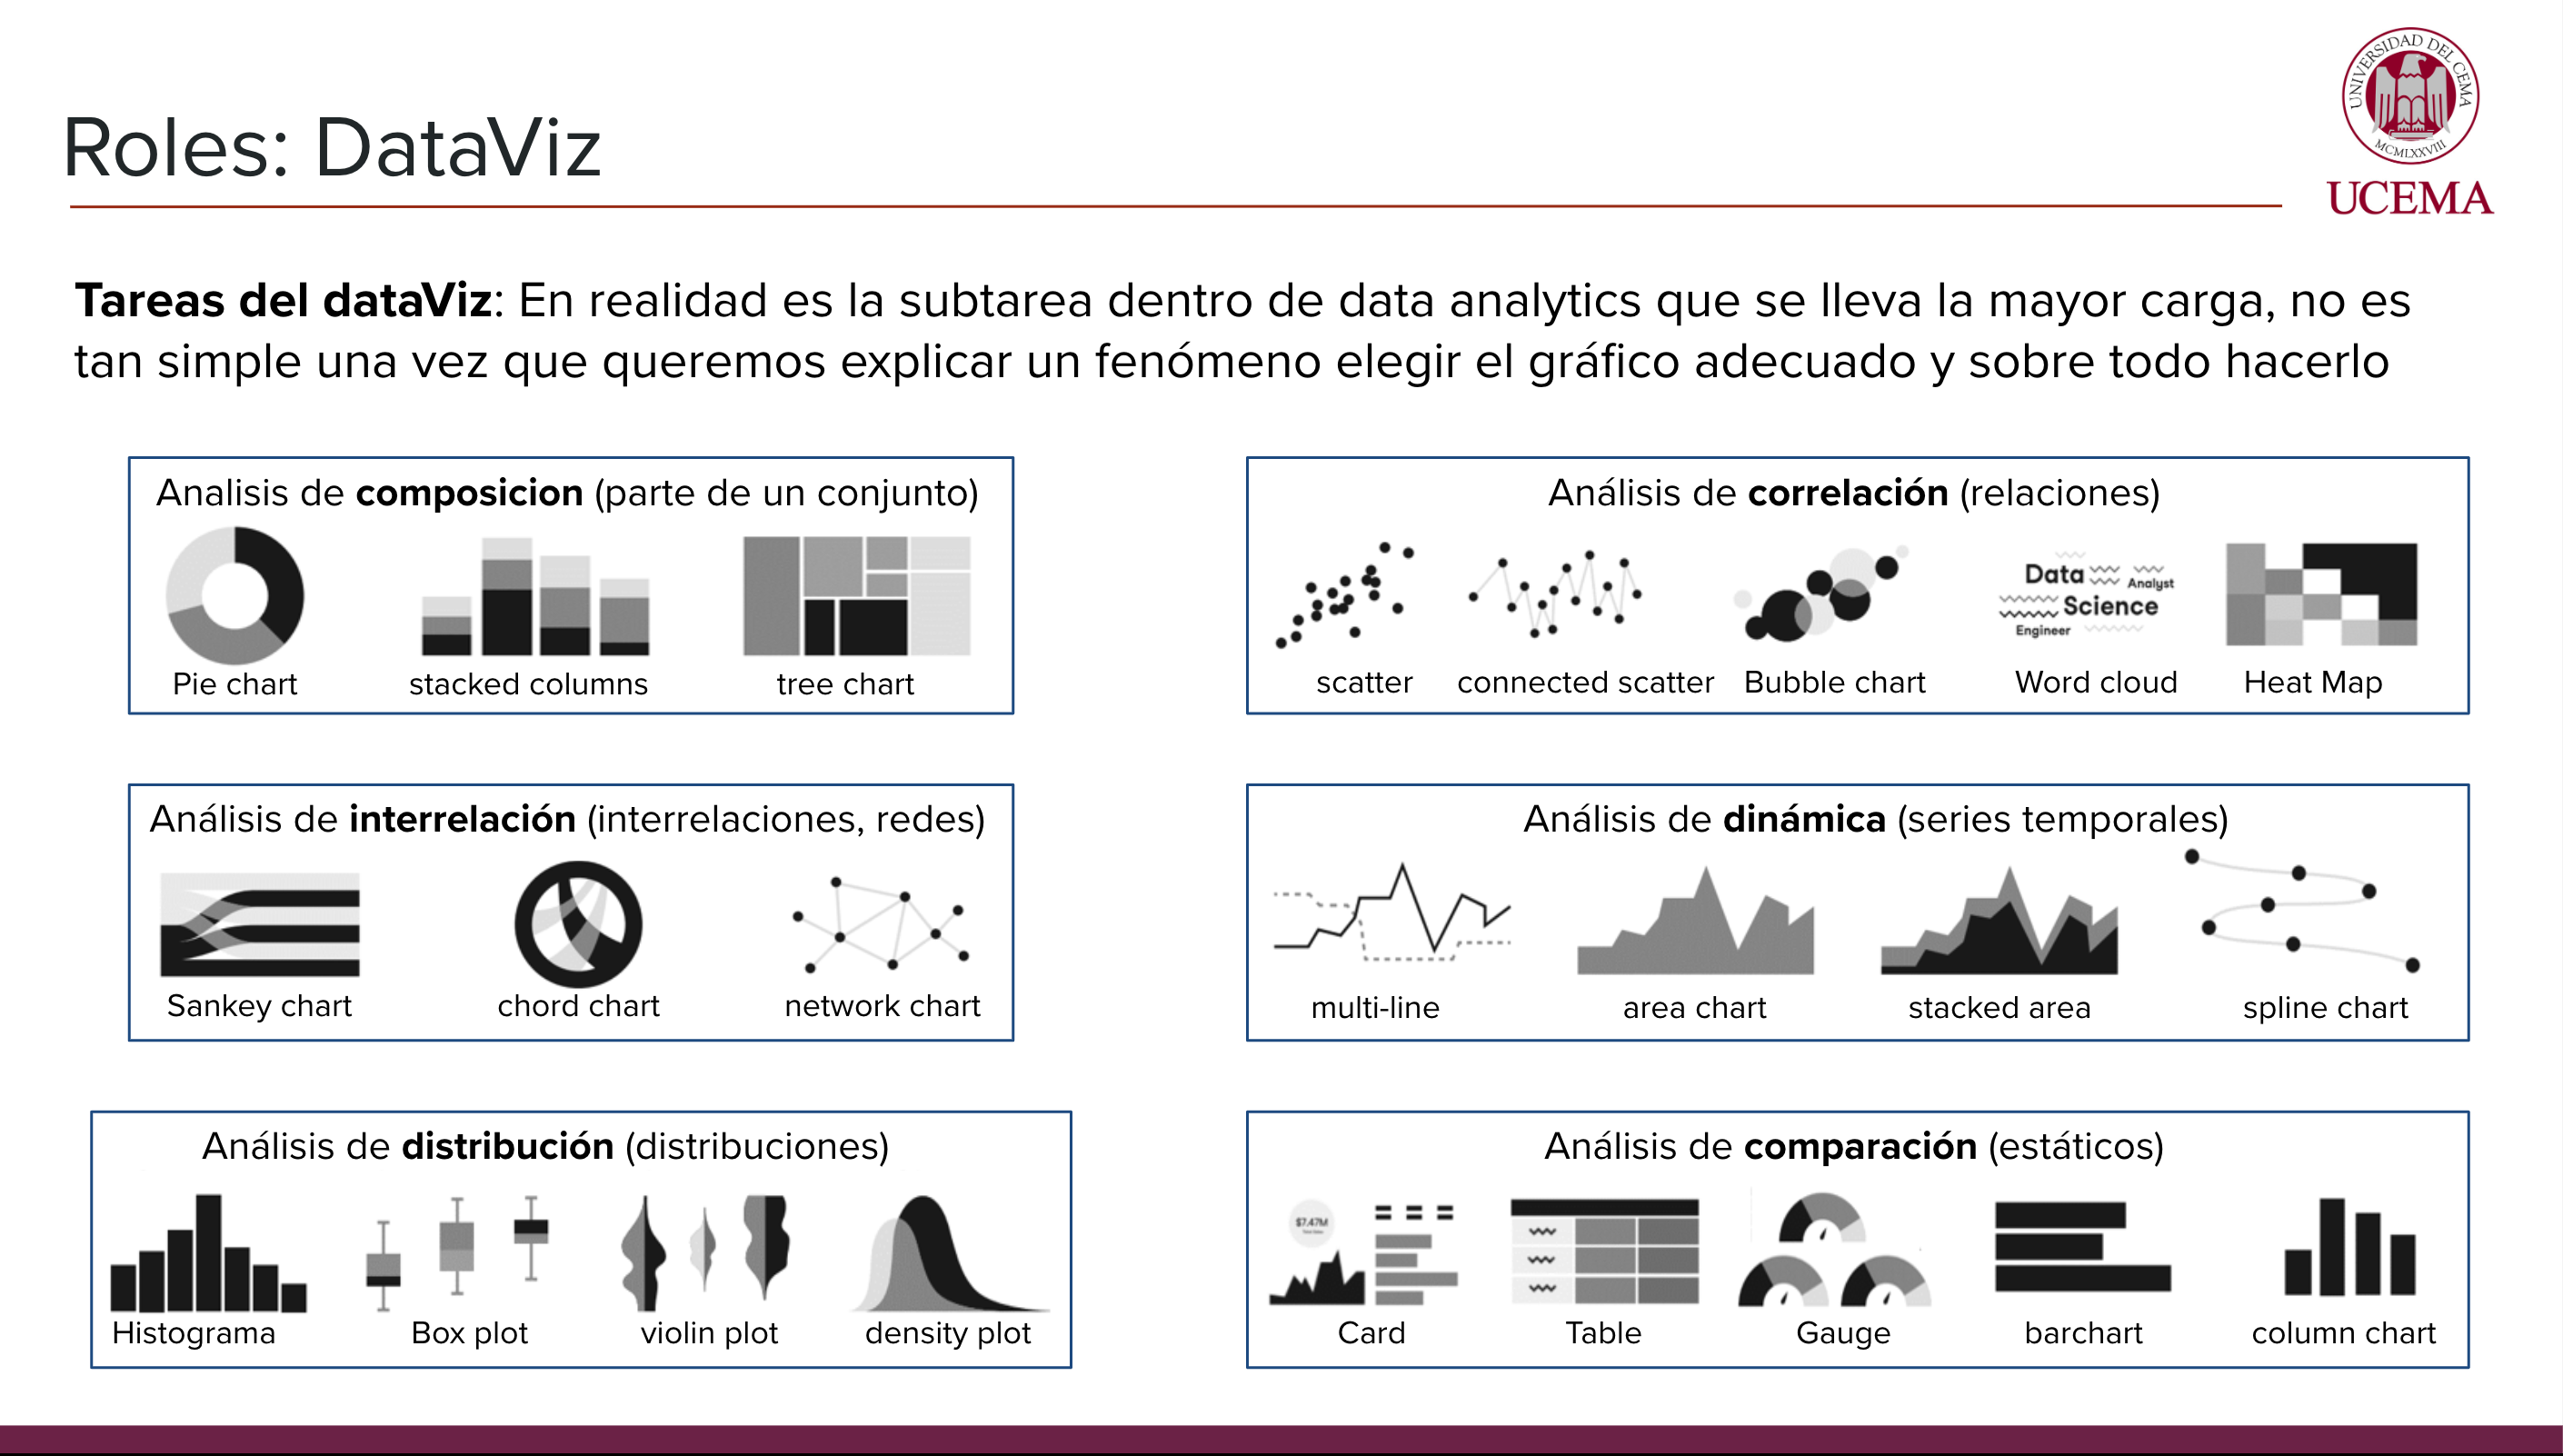

array([[<Axes: title={'center': 'Lunes'}>,
        <Axes: title={'center': 'Martes'}>],
       [<Axes: title={'center': 'Miercoles'}>,
        <Axes: title={'center': 'Jueves'}>],
       [<Axes: title={'center': 'Viernes'}>, <Axes: >]], dtype=object)

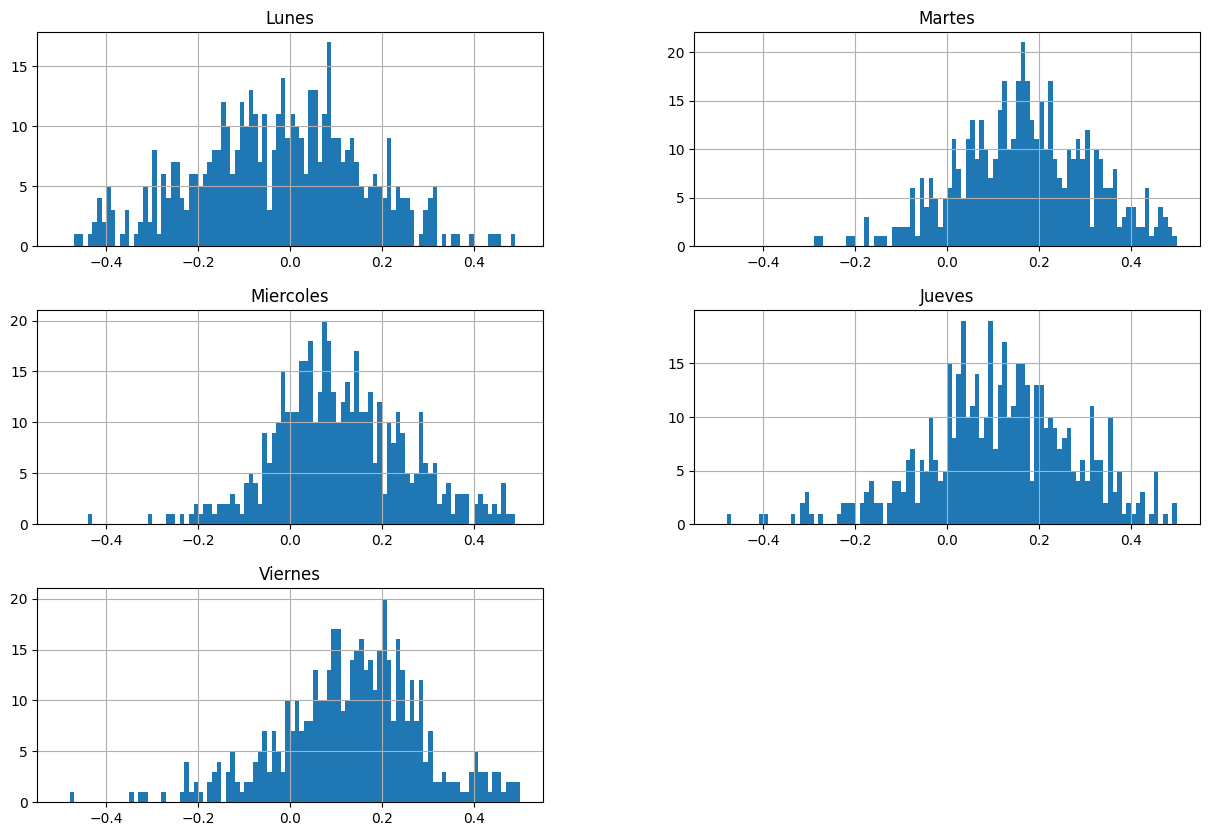

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
resumen.hist(figsize=(15,10), bins=100, range=(-0.5,0.5))

<Axes: >

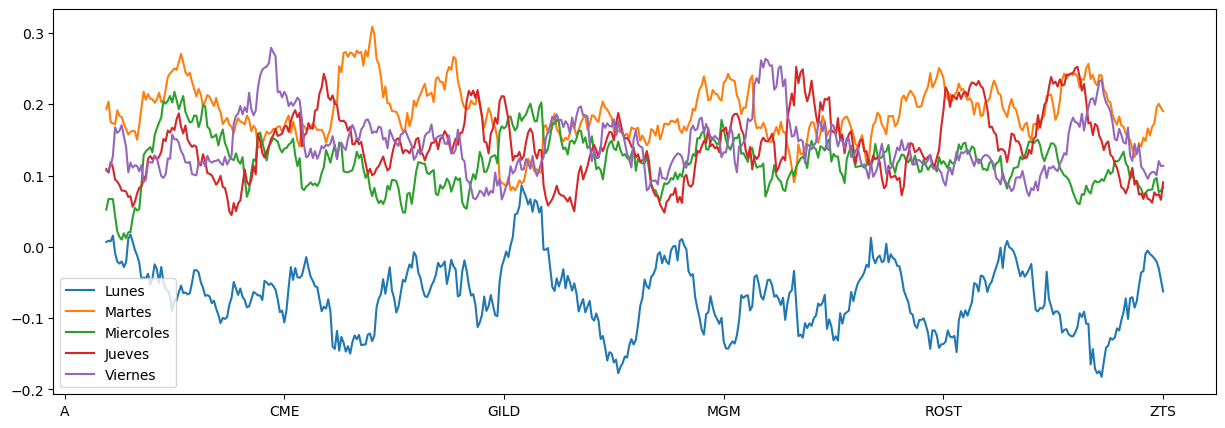

In [ ]:
resumen.rolling(20).mean().plot(figsize=(15,5))

<Axes: >

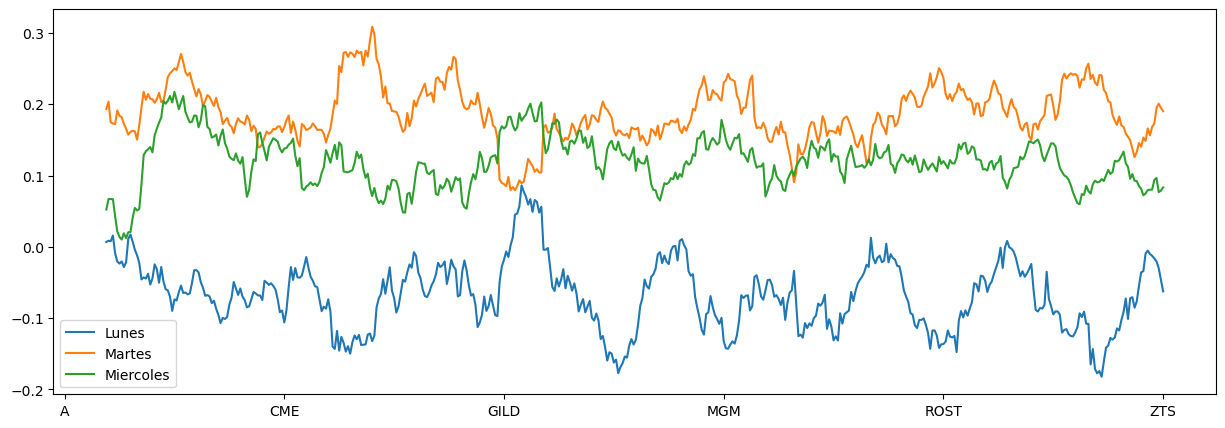

In [ ]:
df1 = resumen['Lunes'].rolling(20).mean()
df2 = resumen['Martes'].rolling(20).mean()
df3 = resumen['Miercoles'].rolling(20).mean()

df_todos=  pd.concat([df1,df2,df3], axis=1)
df_todos.plot(figsize=(15,5))

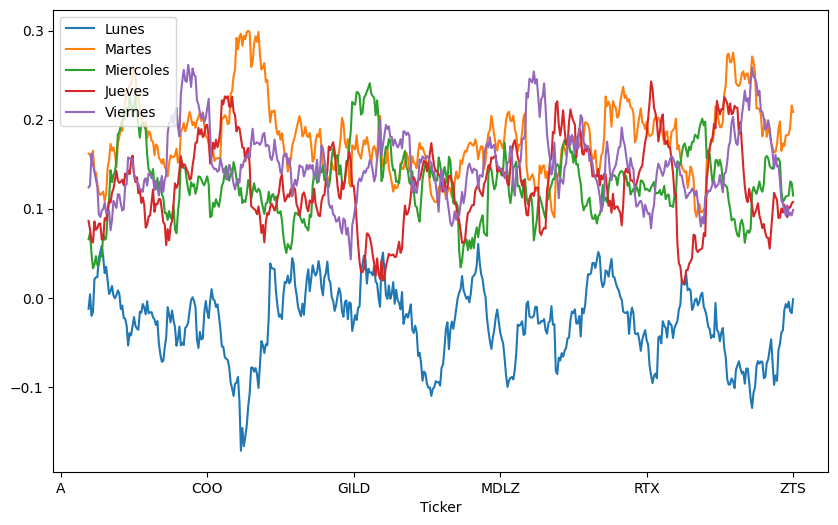

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for dia in resumen.columns:
    resumen[dia].rolling(20).mean().plot()


plt.legend(loc='upper left')

<Axes: ylabel='Frequency'>

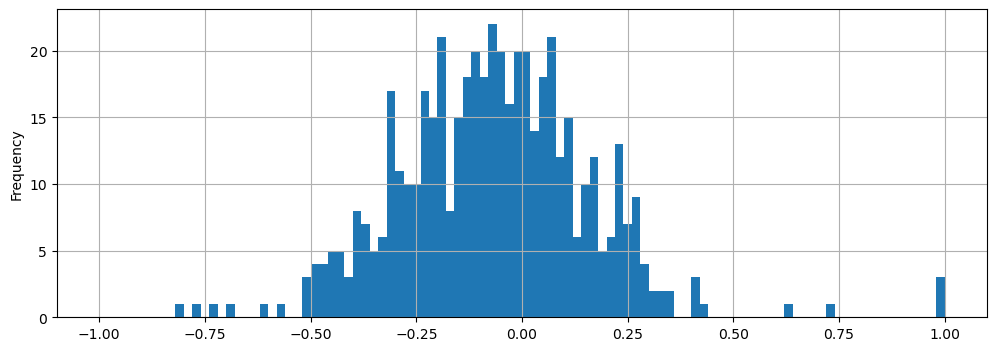

In [ ]:
resumen.Lunes.plot(kind='hist', bins=100, grid=True, figsize=(12,4), range=(-1,1))

<Axes: ylabel='Frequency'>

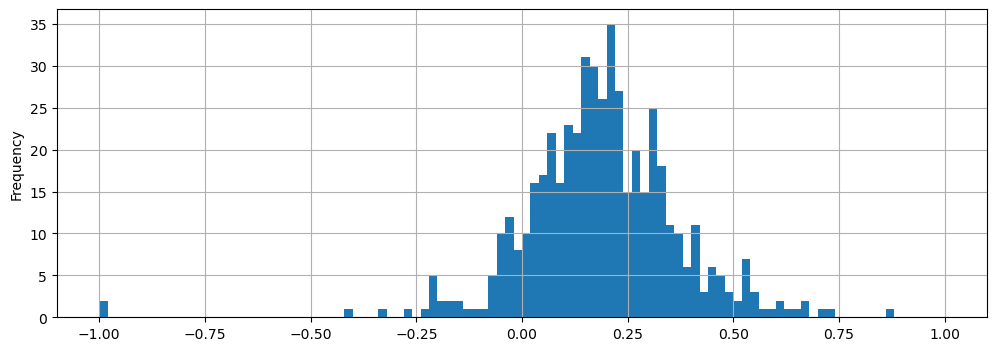

In [ ]:
resumen.Martes.plot(kind='hist', bins=100, grid=True, figsize=(12,4), range=(-1,1))

### BoxPlot

<Axes: >

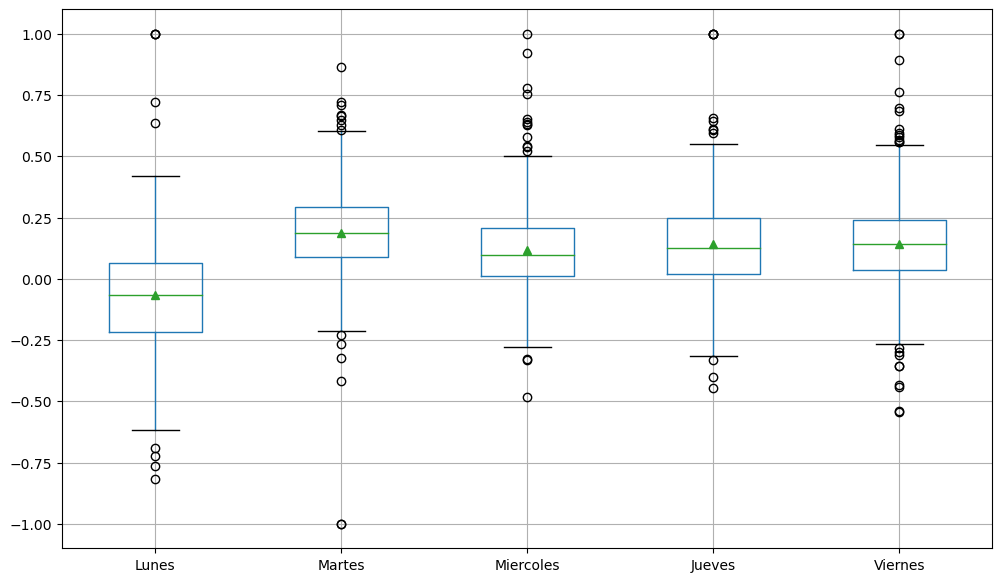

In [ ]:
pd.plotting.boxplot_frame(resumen, whis=1.5, showmeans=True, figsize=(12,7))

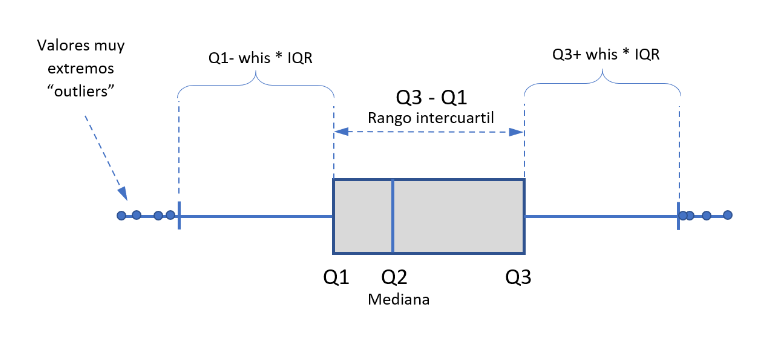

# Funciones Acumulativas

Las funciones acumulativas nos permiten trabajar en la fila "n" de una tabla con todos los datos de las filas "0 a n"
<br>Dentro de este tipo de funciones encontramos:

* cummax()  El máximo acumulado (ideal para máximo histórico por fecha)
* cummin()  El mínimo acumulado (ideal para mínimo histórico por fecha)
* cumsum() La suma acumulada (ideal para armado se subtotales por fecha)
* cumprod() El producto acumulado (ideal para rendimiento compuesto)

## Cummax()

El uso típico que le vamos a dar a esta función es para saber el máximo histórico de una serie en cada punto de la misma

In [ ]:
data = yf.download('GGAL', auto_adjust=True)
data = data.drop(["High","Low","Volume"], axis=1)

data['maxHist'] = data.Close.cummax()
data.head(6)

[*********************100%***********************]  1 of 1 completed


Price,Close,Open,maxHist
Ticker,GGAL,GGAL,
Date,,,
2000-07-25,13.026933,13.015302,13.026933
2000-07-26,13.026933,12.840834,13.026933
2000-07-27,13.026933,13.026933,13.026933
2000-07-28,12.933883,13.073457,13.026933
2000-07-31,13.166504,13.026930,13.166504
2000-08-01,13.026933,13.073457,13.166504


<Axes: xlabel='Date'>

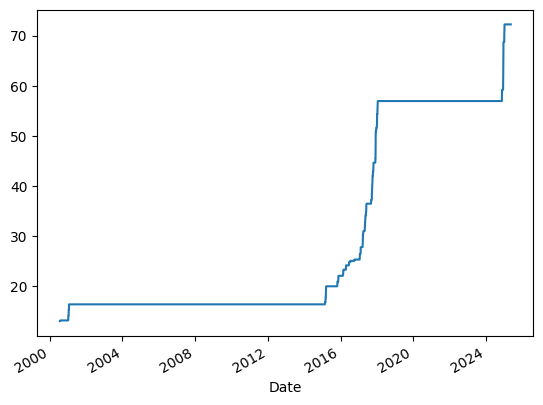

In [ ]:
data.maxHist.plot()

## Cummin()

Obviamente es lo mismo que el cummax pero para mínimos, la combinación de cummax() y cummin() va a ser muy util para backtestings de drawdowns y recuperaciones posteriores

In [ ]:
data['minHist'] = data.Close.cummin()
data.head(6)

Price,Close,Open,maxHist,minHist
Ticker,GGAL,GGAL,,
Date,,,,
2000-07-25,13.026933,13.015302,13.026933,13.026933
2000-07-26,13.026933,12.840834,13.026933,13.026933
2000-07-27,13.026933,13.026933,13.026933,13.026933
2000-07-28,12.933883,13.073457,13.026933,12.933883
2000-07-31,13.166504,13.026930,13.166504,12.933883
2000-08-01,13.026933,13.073457,13.166504,12.933883


<Axes: xlabel='Date'>

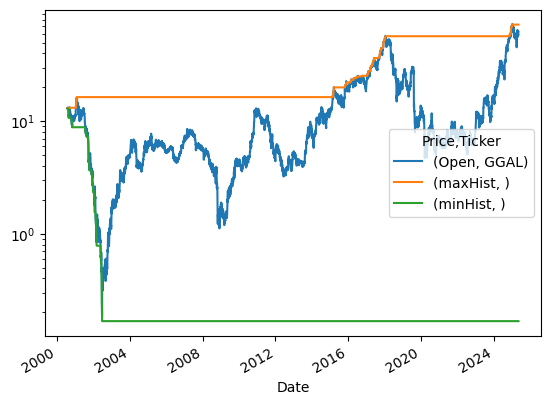

In [ ]:
data.iloc[:, -3: ].plot(logy=True)

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

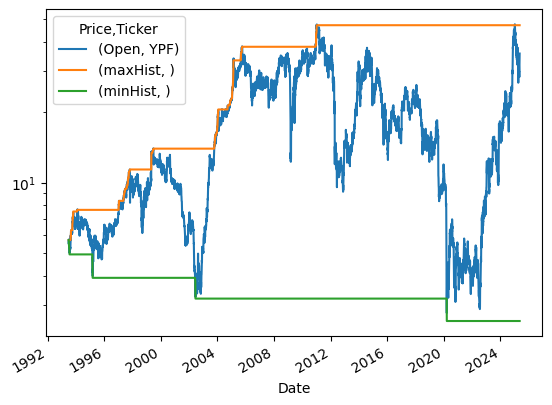

In [ ]:
data = yf.download('YPF', auto_adjust=True)
data['maxHist'] = data.Close.cummax()
data['minHist'] = data.Close.cummin()
data = data.drop(["High","Low","Volume"], axis=1)
data.iloc[:, -3: ].plot(logy=True)

## Cumsum()

Cumsum() es obviamente una funcion de sumas acumuladas, que en la posicion de la fila "n" nos devuelve la suma de "0 a n" (inclusive)

$$ \large cumsum\hspace{3mm}(X_{n})\hspace{3mm}  =  \hspace{3mm} \sum_{i=0}^{n}x_{i} $$

En el ejemplo aprovechamos para borrar las columnas de OHLC par limpiar un poco la salida con la función drop()

In [ ]:
data = yf.download('GGAL', auto_adjust=True)
data['volumenAcum'] = data.Volume.cumsum()/1000000
data = data.drop(['Open','High','Low','Close'], axis=1).dropna().round(2)
data.head(6)

[*********************100%***********************]  1 of 1 completed


Price,Volume,volumenAcum
Ticker,GGAL,
Date,,
2000-07-25,126200,0.13
2000-07-26,28900,0.16
2000-07-27,61200,0.22
2000-07-28,146100,0.36
2000-07-31,178400,0.54
2000-08-01,87400,0.63


<Axes: xlabel='Date'>

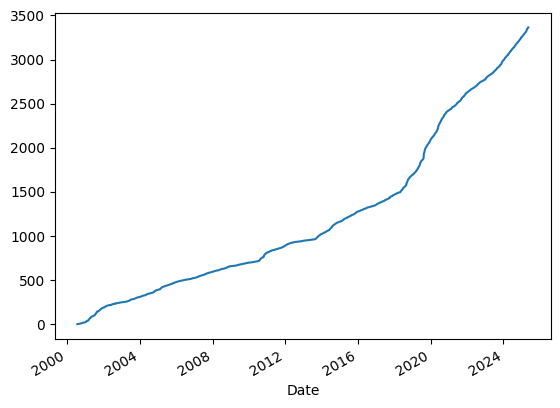

In [ ]:
data.volumenAcum.plot()

## Cumprod()

Cumprod() es una función de productorio, es decir el producto acumulado de 0 a n, para la fila n

$$ \large cumprod\hspace{3mm}(X_{n})\hspace{3mm}  =  \hspace{3mm} \prod_{i=0}^{n}x_{i} $$

Vamos a usar esta fórmula para calcular rendimiento compuesto, es muy sencillo:
<br>  1- Creamos una columna "variacion" con el valor "r", rendimiento porcentual diario.
<br>  2- Creamos una columna "factor" con el valor (1+r)
<br>  2- Luego vamos a aplicar el productorio para cada fila de esa columna "factor" y le restamos 1 al resultado.

In [ ]:
data = yf.download('GGAL', auto_adjust=True)

data['variacion'] = data['Close'].pct_change()
data['factor'] = 1 + data['variacion']
data['rendimientoAcum'] = (data.factor.cumprod()-1)*100
data['base100'] = (data.factor.cumprod())*100

data = data.drop(['Open','High','Low','Close','Volume'],axis=1).dropna().round(4)
data

[*********************100%***********************]  1 of 1 completed


Price,variacion,factor,rendimientoAcum,base100
Ticker,,,,
Date,,,,
2000-07-26,0.0000,1.0000,0.0000,100.0000
2000-07-27,0.0000,1.0000,0.0000,100.0000
2000-07-28,-0.0071,0.9929,-0.7143,99.2857
2000-07-31,0.0180,1.0180,1.0714,101.0714
2000-08-01,-0.0106,0.9894,-0.0000,100.0000
...,...,...,...,...
2025-05-08,0.0014,1.0014,348.5323,448.5323
2025-05-09,0.0065,1.0065,351.4493,451.4493


<Axes: xlabel='Date'>

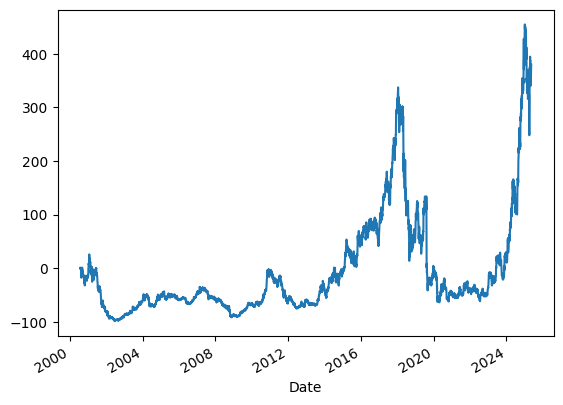

In [ ]:
data.rendimientoAcum.plot()

<Axes: xlabel='Date'>

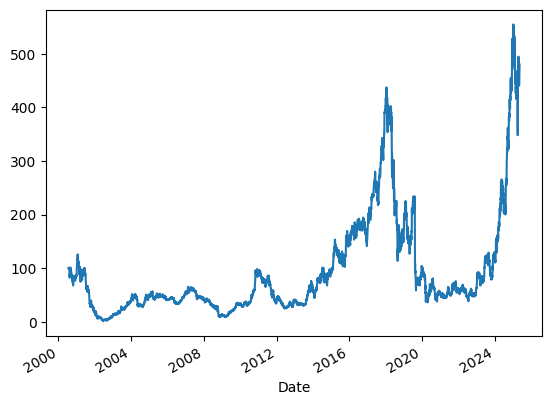

In [ ]:
data.base100.plot()

## Algo mas avanzado de MatPlotLib

/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:763: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(y))
/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:906: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


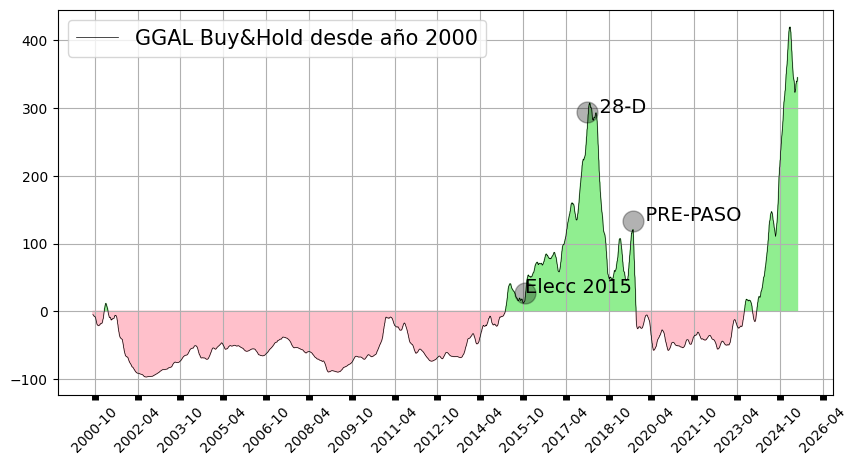

In [ ]:
import matplotlib.pyplot as plt


import matplotlib.dates as mdates
from datetime import datetime as dtdt

fig, ax = plt.subplots(figsize=(10,5))

# Ploteo
curva = data.rendimientoAcum.rolling(30).mean()

# c es color
# ls es linestyle
# lw es linewidth

ax.plot(curva, c='k', ls='-', lw=.5, label='GGAL Buy&Hold desde año 2000')

ax.fill_between(data.index, curva, 0, where=curva < 0 ,color='pink')
ax.fill_between(data.index, curva, 0, where=curva > 0 ,color='lightgreen')

ax.legend(loc='upper left', fontsize=15)

# ticks y labels
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=18))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.tick_params(axis='x', rotation=45, labelsize=10, width=5)
ax.grid()

# Anotaciones
eventos = { "Elecc 2015": dtdt(2015,10,23), "  28-D" : dtdt(2017,12,28),  '  PRE-PASO' : dtdt(2019,8,9) }
for k,v in eventos.items():
    ax.plot(eventos[k], data.loc[v].rendimientoAcum, 'ko', markersize=15, alpha=.3)
    ax.annotate(k, xy=(v,data.loc[v].rendimientoAcum), fontsize=14)

## Rolling vs Acumulativas vs Descriptivas (diferencias)
* cummax vs rolling(n).max() vs max()
* cummin vs rolling(n).min() vs min()
* cumsum vs rolling(n).sum() vs sum()



## Reflexionar diferencias y casos de uso

look-ahead Bias, leakage

# Agrupamiento

In [ ]:
data = yf.download('GGAL', auto_adjust=True)
data['variacion'] = data['Close'].pct_change()
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,variacion
Ticker,GGAL,GGAL,GGAL,GGAL,GGAL,
Date,,,,,,
2000-07-25,13.026931,13.213030,12.468634,13.015300,126200,NaN
2000-07-26,13.026931,13.073456,12.794307,12.840832,28900,0.000000
2000-07-27,13.026931,13.119980,12.933881,13.026931,61200,0.000000
2000-07-28,12.933884,13.073458,12.747785,13.073458,146100,-0.007143
2000-07-31,13.166509,13.166509,12.561687,13.026934,178400,0.017986
...,...,...,...,...,...,...
2025-05-08,58.430000,59.450001,57.110001,59.130001,1231800,0.001371
2025-05-09,58.810001,60.980000,58.270000,58.500000,1506700,0.006504


## Agrupamiento - Indices de fechas

### Por día de la semana

In [ ]:
agrupados = data.Volume.groupby(data.index.dayofweek).sum()
agrupados

Ticker,GGAL
Date,
0,622665300
1,710602700
2,691498985
3,689574000
4,649714000


### Por trimestre

In [ ]:
agrupados = data.Close.groupby(data.index.to_period('Q')).last()
agrupados

Ticker,GGAL
Date,
2000Q3,11.165942
2000Q4,11.026366
2001Q1,11.433325
2001Q2,11.173347
2001Q3,4.516400
...,...
2024Q2,29.236904
2024Q3,42.090000
2024Q4,62.320000


### Por año

<Axes: xlabel='Date'>

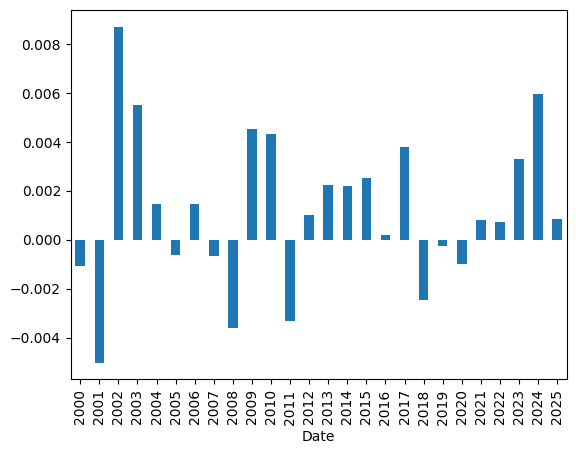

In [ ]:
agrupados = data.variacion.groupby(data.index.to_period('Y')).mean()
agrupados.plot(kind='bar')

### Por mas de un criterio

In [ ]:
agrupados = data.groupby([data.index.year, data.index.dayofweek]).sum()
agrupados.head(20)

Price           Close        High         Low        Open    Volume variacion
Ticker           GGAL        GGAL        GGAL        GGAL      GGAL          
Date Date                                                                    
2000 0     223.225800  226.342959  219.410769  223.737572   2192700 -0.009999
     1     260.399078  264.772406  255.886177  260.585177   3635400 -0.026300
     2     257.526181  262.969578  252.734131  259.224335   3892700 -0.258724
     3     249.419231  253.362205  243.638530  247.186043   6454200  0.249277
     4     258.863777  264.074551  255.513994  260.364201   5101400 -0.073087
2001 0     417.907617  429.253373  411.605952  421.149341  25017500 -0.230102
     1     463.925910  476.645065  456.696219  467.511397  30585500 -0.201903
     2     454.633478  466.664793  444.295576  456.393027  35334500  0.011191
     3     460.174735  470.887261  450.230026  462.780054  39503100 -0.291066
     4     447.792072  459.430722  437.780766  451.398979  35556000 -0.533959
2002 0      44.883159   47.759992   43.023464   45.520768   7069200 -0.582779
     1      49.354016   52.170125   46.575860   49.262929   9342000  0.272972
     2      47.964938   50.803818   45.247506   48.693634  13592700  1.072330
     3      48.374828   51.266842   45.429679   48.253378  16666100  1.875243
     4      48.010480   51.608420   45.452452   48.936532  14014400 -0.443120
2003 0     150.574528  154.081382  146.209939  149.974872   9021300  0.385511
     1     161.459434  164.632300  155.645042  160.844594  12039400  0.715602
     2     160.837013  165.247146  156.950629  161.375946  14062800 -0.090098
     3     147.993736  151.910481  144.145306  147.773610  12791800  0.052750
     4     153.307145  156.601461  149.306903  152.639173  11952200  0.324364

## Agrupamientos lógicos y variables categóricas

###  Ejercicio de repaso

Dado el diccionario que representa los valores tope de "segmentos de volatilidad":
       
       regimenes = {'Baja':0.4, 'Media':.6, 'Alta':99}  
    
Crear una lista de los delimitadores de cada segmento que comience por 0

### Segmentación

In [ ]:
data = yf.download('GGAL', auto_adjust=True)

data['variacion'] = data['Close'].pct_change()
data['volatilidad'] = data.variacion.rolling(250).std() * 250**0.5
data.dropna(inplace=True)

regimenes = {'Baja':0.4, 'Media':.6, 'Alta':99}
bins = [0] + list(regimenes.values())

data['regimen'] = pd.cut(data.volatilidad, bins=bins, labels=list(regimenes.keys()))
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,variacion,volatilidad,regimen
Ticker,GGAL,GGAL,GGAL,GGAL,GGAL,,,
Date,,,,,,,,
2001-07-23,8.531822,9.093526,8.433144,9.047983,1151900,0.027423,0.558951,Media
2001-07-24,8.121930,8.509050,8.099159,8.509050,518800,-0.048043,0.560919,Media
2001-07-25,8.008073,8.114341,7.765173,7.970120,1405300,-0.014018,0.561063,Media
2001-07-26,7.795537,7.932168,7.704450,7.863852,741000,-0.026540,0.561600,Media
2001-07-27,7.863852,7.932167,7.514684,7.719631,2540300,0.008763,0.561356,Media
...,...,...,...,...,...,...,...,...
2025-05-08,58.430000,59.450001,57.110001,59.130001,1231800,0.001371,0.576167,Media
2025-05-09,58.810001,60.980000,58.270000,58.500000,1506700,0.006504,0.575898,Media


In [ ]:
data.groupby('regimen').size()

<ipython-input-174-fada8c58c945>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('regimen').size()


,0
regimen,
Baja,1212
Media,3191
Alta,1586


### Ejercicio

    Con esta matriz, extraer la variación diaria que delimita al primer y último decil de cada régimen de volatilidad
    Razonar utilidad de este tipo de ejercicio

## Métodos para concatenar a los agrupamientos

Así como usamos la funcón count() podemos usar otro tipo de funciones, por ejemplo:
* first()
* last()
* min()
* max()
* sum()
* prod()
* mean()
* median()
* std() desvio estandar (sigma)
* var() varianza (sigma^2)
* skew()  (Coeficiente de asimetria)
* kurtosis()
* quantile()  

# Mas funciones

## Clip (Acotado)

In [ ]:
tabla = yf.download(['AAPL','SPY','QQQ'], auto_adjust=True)['Close'].pct_change().dropna() *100
tabla

[*********************100%***********************]  3 of 3 completed


,AAPL,QQQ,SPY
Date,,,
1999-03-11,-1.151909,0.489585,1.112742
1999-03-12,3.106941,-2.436077,-0.956976
1999-03-15,2.636317,2.871478,1.425139
1999-03-16,4.220300,0.849415,-0.381046
1999-03-17,-4.049403,-0.721985,-0.430270
...,...,...,...
2023-05-23,-1.515499,-1.267631,-1.122284
2023-05-24,0.163207,-0.512956,-0.724480
2023-05-25,0.669233,2.433290,0.865990


In [ ]:
tabla_acotada = tabla.clip(-4,4)
tabla_acotada

,AAPL,QQQ,SPY
Date,,,
1999-03-11,-1.151909,0.489585,1.112742
1999-03-12,3.106941,-2.436077,-0.956976
1999-03-15,2.636317,2.871478,1.425139
1999-03-16,4.000000,0.849415,-0.381046
1999-03-17,-4.000000,-0.721985,-0.430270
...,...,...,...
2023-05-23,-1.515499,-1.267631,-1.122284
2023-05-24,0.163207,-0.512956,-0.724480
2023-05-25,0.669233,2.433290,0.865990


# Repaso de Estadística 2

## Desvío Estandrar - Fórmulas

El desvio es el sigma, la varianza es el sigma cuadrado

$$ \large \sigma^2 = \frac{1}{n}  \sum_{x=i}^{n} . (X_i - \bar{X} )^2  $$

In [ ]:
tabla.std()

AAPL    2.553220
QQQ     1.744783
SPY     1.241703
dtype: float64

## Error estandar - Fórmulas

$$ \Large \frac{\sigma}{\sqrt{n}}$$

In [ ]:
tabla.sem()

AAPL    0.032704
QQQ     0.022349
SPY     0.015905
dtype: float64

## Varianza

In [ ]:
tabla.std()**2

AAPL    6.518931
QQQ     3.044268
SPY     1.541827
dtype: float64

In [ ]:
tabla.var()

AAPL    6.518931
QQQ     3.044268
SPY     1.541827
dtype: float64

## Skew - Fórmulas

$$ \large  skew =  \frac{\mu_3}{\sigma^3}  =  \frac{\sum_{x=i}^{n} \frac{1}{n} . (X_i - \bar{X} )^3}{\sigma^3} $$

## Repaso de Coeficiente de Asimetría

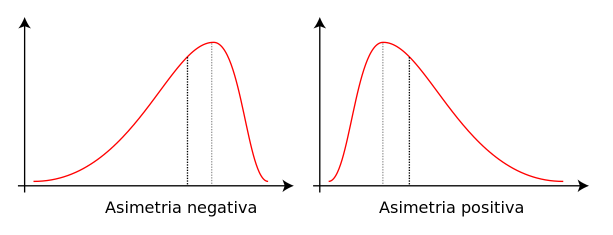

## Kurtosis

$$ \Large kurtosis = \frac{\sum_{i=1} (X_i-\bar{X})^4}{n . \sigma^4}$$


Coeficiente de apuntamiento

<div style="width:600px;float:left;">
    <br>La Curtosis nos da una idea de la forma, mientras mas alta, mas valores cerca de la media y mas gruesas las colas
    <ul>
        <li> Leptocúrtica,  Curtosis > 3 (más apuntada y con colas más gruesas que la normal) </li>
        <li> Platicúrtica,  Curtosis < 3 (menos apuntada y con colas menos gruesas que la norma) </li>
        <li> Mesocúrtica,   Curtosis = 3 (tiene una distribución normal) </li>
    </ul>
</div>
<div style="width:350px;float:right;margin-top:-25px;">
    <img src="./imagenes/kurtosis.png" style="width:300px;height:230px;">
</div>


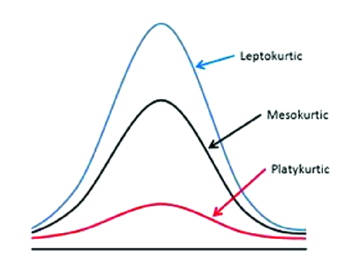

In [ ]:
tabla.kurt()

AAPL    31.830751
QQQ      6.736130
SPY     11.125343
dtype: float64

In [ ]:
tabla.skew()

AAPL   -1.285874
QQQ     0.214783
SPY    -0.004426
dtype: float64

In [ ]:
tabla.var()

AAPL    6.518931
QQQ     3.044268
SPY     1.541827
dtype: float64

## Covarianza

$$ \large s_{xy}={1 \over n}\sum _{i=1}^{n}{(x_{i}-{\overline {x}})(y_{i}-{\overline {y}})} $$

In [ ]:
import yfinance as yf

activos = ['GGAL','YPF','PAM','EDN','BBAR']
data = yf.download(activos, start='2001-01-01', end='2020-08-30')['Close']
tabla = data.pct_change().dropna()*100
tabla

[*********************100%***********************]  5 of 5 completed


Ticker,BBAR,EDN,GGAL,PAM,YPF
Date,,,,,
2009-10-12,4.817527,5.421684,1.698114,1.176468,-0.656068
2009-10-13,-1.114219,1.714281,0.371034,-2.015503,1.447789
2009-10-14,-1.408432,0.000000,2.587825,-0.474681,0.300440
2009-10-15,-0.857159,-1.460665,-2.702715,-0.635937,1.098361
2009-10-16,-3.314113,1.368300,-1.666667,0.400004,-0.296286
...,...,...,...,...,...
2020-08-24,-0.903590,-5.660378,-0.494543,0.363967,0.934583
2020-08-25,1.823678,-2.857140,1.093424,1.450588,2.777779
2020-08-26,-3.283578,1.470587,-1.278255,2.234138,0.180176


In [ ]:
tabla.GGAL.cov(tabla.GGAL)

12.465612243449538

In [ ]:
tabla.GGAL.cov(tabla.EDN)

7.6261831578295745

### Matriz de covarianzas

In [ ]:
tabla.cov()

Ticker,BBAR,EDN,GGAL,PAM,YPF
Ticker,,,,,
BBAR,12.709455,7.705112,10.337803,7.336794,5.841313
EDN,7.705112,16.075827,7.626183,7.554619,5.075765
GGAL,10.337803,7.626183,12.465612,7.344024,6.085248
PAM,7.336794,7.554619,7.344024,9.924349,4.742027
YPF,5.841313,5.075765,6.085248,4.742027,9.376967


In [ ]:
tabla.corr()

Ticker,BBAR,EDN,GGAL,PAM,YPF
Ticker,,,,,
BBAR,1.000000,0.539050,0.821312,0.653269,0.535076
EDN,0.539050,1.000000,0.538721,0.598101,0.413413
GGAL,0.821312,0.538721,1.000000,0.660277,0.562847
PAM,0.653269,0.598101,0.660277,1.000000,0.491566
YPF,0.535076,0.413413,0.562847,0.491566,1.000000
